## PROJECT - (18th Sept, 2020 - 04th Oct, 2020) 

In [252]:
# Importing necessary libraries

import pandas as pd             # To read the data set
import numpy as np              # Importing numpy library
import seaborn as sns           # For data visualization
import matplotlib.pyplot as plt        # Necessary library for plotting graphs
sns.set(color_codes = True)
%matplotlib inline

from sklearn import metrics            # Importing metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix, average_precision_score, roc_auc_score
from sklearn.model_selection import train_test_split       # Splitting data train and test set
from sklearn.linear_model import LogisticRegression        # For Logistic Reg model building
from sklearn.naive_bayes import GaussianNB                 # For Naive Bayes model building
from sklearn import svm                                    # For SVM model building
from sklearn.neighbors import KNeighborsClassifier         # For KNN model building

from sklearn.tree import plot_tree                         # For visual representation of decision trees
from sklearn.tree import DecisionTreeClassifier            # For Decision Tree model building
from sklearn.ensemble import RandomForestClassifier        # For Random Forest model building
from sklearn.ensemble import BaggingClassifier             # For Bagging model building
from sklearn.ensemble import AdaBoostClassifier            # For Adaboost model building
from sklearn.ensemble import GradientBoostingClassifier    # For Gradientboost model building

from scipy.stats import zscore                  # Importing to find zscore
from sklearn import preprocessing               # Importing to standardize data
from sklearn.impute import SimpleImputer        # Importing to fill in null values in the data

### 1. Load the dataset

In [253]:
# Running steps to check and prepare the data

df = pd.read_csv('Data Parkinsons', delimiter =',', engine = 'python')

### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

In [254]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [255]:
df.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

In [256]:
df.shape

(195, 24)

In [257]:
df.size

4680

In [258]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [259]:
df.count()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
dtype: int64

In [260]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [262]:
df.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [263]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

1.The dataset consists of (195 patients & 24 features). 

2.On checking for lapses in the dataset we can conclude by saying  that the data does not have any null values & does not have any major cleaning that needs to be done. 

3.Our analysis above shows all the features linked to the patinets are reasonably skewed. 

4.We also notice from the the 5 point summary table that there is alot of variation with the units of the data, and eventually we would need scale the same to arrive at a relatively clearer and more realistic accuracy. 

### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread tails, relationships between variables etc, mention your observations

In [264]:
# Converting status into float64 inorder to have all data in one standard type

df['status'] = df['status'].astype('float64')   
df['status'].value_counts()

1.0    147
0.0     48
Name: status, dtype: int64

There are more diseased people in our dataset.

### I ) Analysis of ( Vocal Fundamental Features )

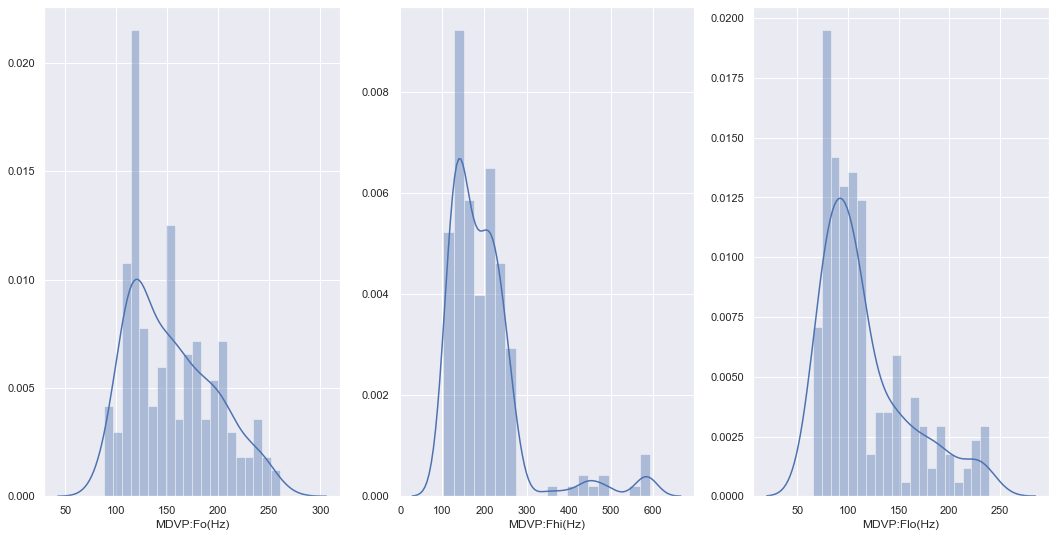

In [265]:
# Visual representation of respective data field features

fig, ax = plt.subplots(1,3, figsize=(18,9))
sns.distplot(df['MDVP:Fo(Hz)'], bins = 20, ax = ax[0])
sns.distplot(df['MDVP:Fhi(Hz)'], bins = 20, ax = ax[1])
sns.distplot(df['MDVP:Flo(Hz)'], bins = 20, ax = ax[2]);

Histogram of features with ("vocal" fundamental frequency). Visualization through the histogram above shows positive skewness in data.

### A. Analysing MDVP:Fo(Hz) column.

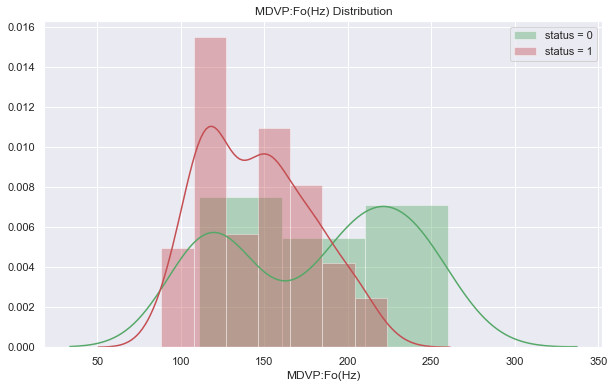

In [266]:
# Plotting a graph for visual analysis of feature MDVP:FO(Hz)

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Fo(Hz)'],kde=True, color='g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Fo(Hz)'], kde=True, color='r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Fo(Hz) Distribution');

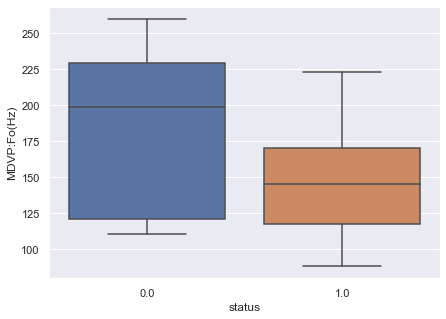

In [267]:
# Boxplot visual analysis of feature MDVP:Fo(Hz)

plt.figure(figsize=(7,5))
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=df);

### B. Analysing MDVP:Fhi(Hz) column.

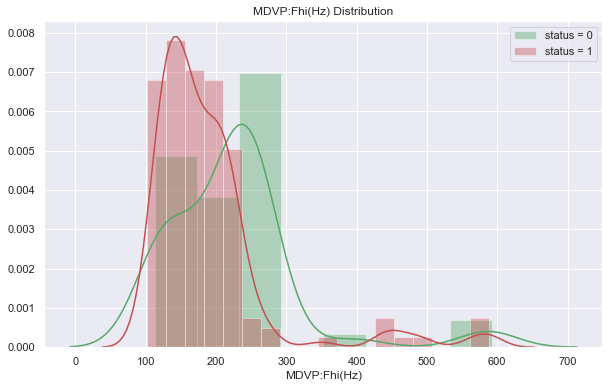

In [268]:
# Plottoing a graph for visual analysis of feature MDVP:Fhi(Hz)

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Fhi(Hz)'], kde=True, color='g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Fhi(Hz)'], kde=True, color='r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Fhi(Hz) Distribution');

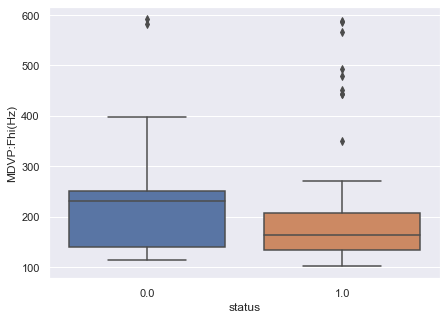

In [269]:
# Boxplot visual analysis of feature MDVP:Fhi(Hz)

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:Fhi(Hz)', data=df);

### C. Analysing MDVP:Flo(Hz) column.

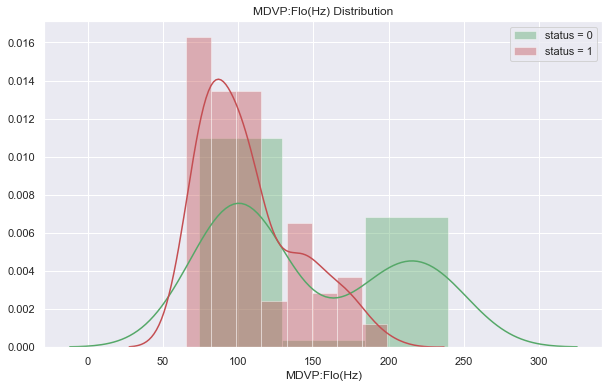

In [270]:
# Plotting a graph for visual analysis of feature MDVP:Flo(Hz)

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Flo(Hz)'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Flo(Hz)'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Flo(Hz) Distribution');

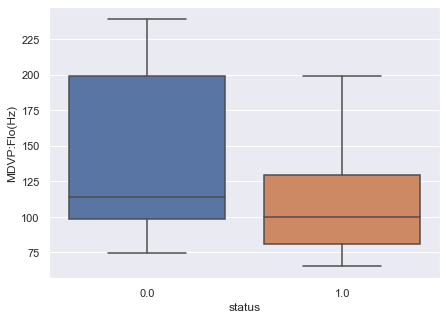

In [271]:
# Boxplot visual analysis of feature MDVP:Flo(Hz)

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:Flo(Hz)', data=df);

Peaks of distribution do not coincide, and there is no clear seperation in frequencies distribution of healthy and ill people.

### II ) Analysis of ( Variation in Fundamental Frequency Features )

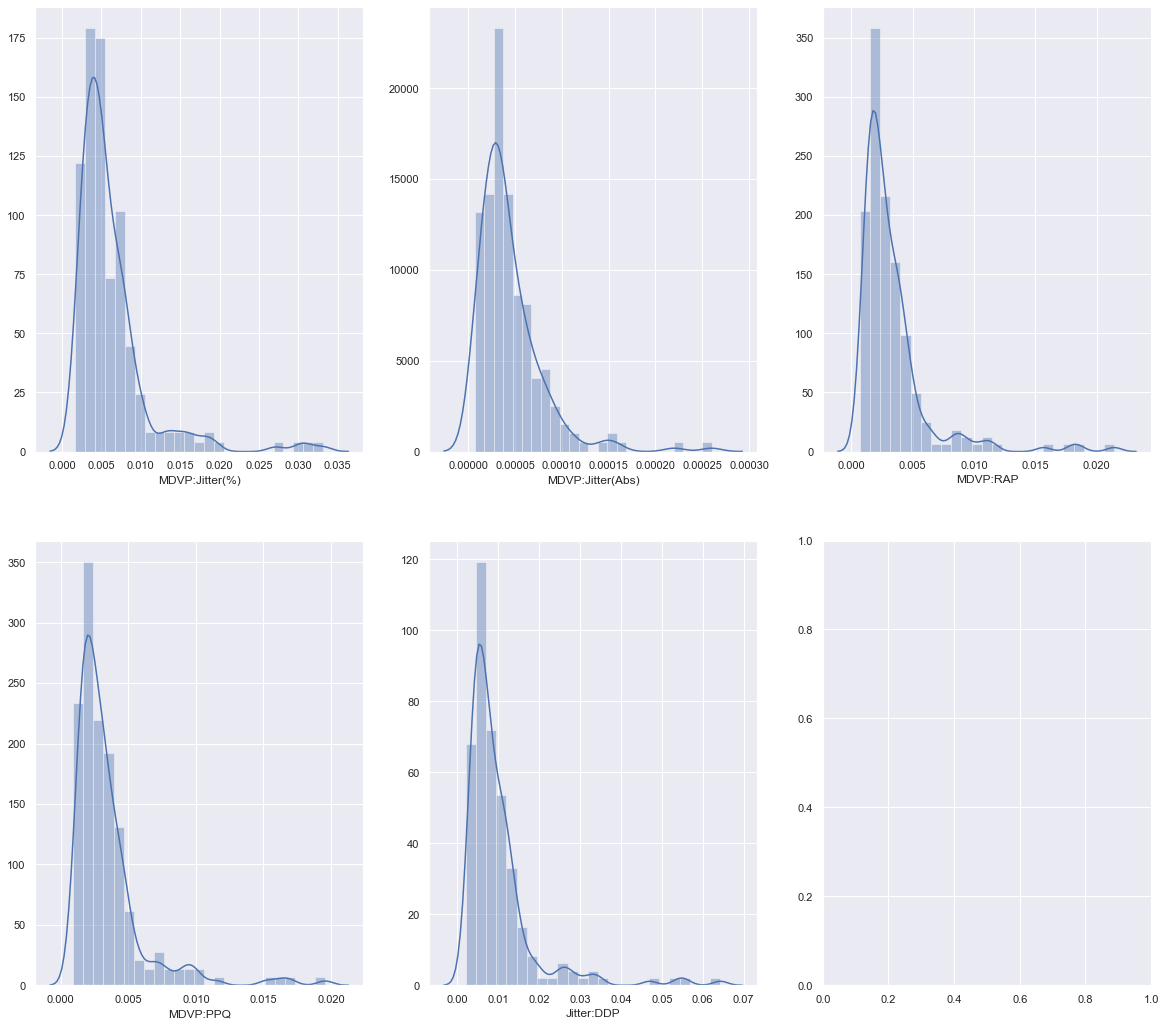

In [272]:
# Visual representation of respective data field features

fig, ax = plt.subplots(2,3, figsize=(20,18))
sns.distplot(df['MDVP:Jitter(%)'], bins = 25, ax = ax[0,0])
sns.distplot(df['MDVP:Jitter(Abs)'], bins = 25, ax = ax[0,1])
sns.distplot(df['MDVP:RAP'], bins = 25, ax = ax[0,2])

sns.distplot(df['MDVP:PPQ'], bins = 25, ax = ax[1,0])
sns.distplot(df['Jitter:DDP'], bins = 25, ax = ax[1,1]);

Histogram of features with ("variation" in fundamental frequency). Visualization through the histogram above shows positive skewness in data.

### A. Analysing MDVP:Jitter(%) column.

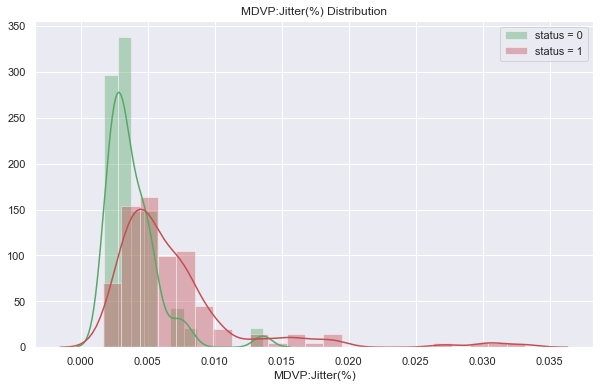

In [273]:
# Plotting a graph for visual analysis of feature MDVP:Jitter(%)

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Jitter(%)'], kde=True, color='g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Jitter(%)'], kde=True, color='r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Jitter(%) Distribution');

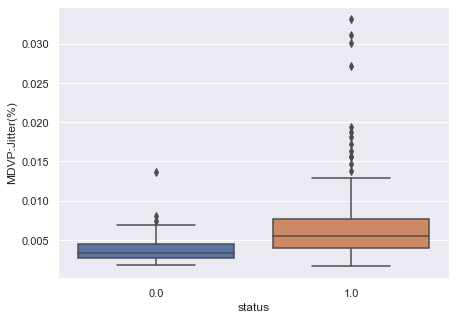

In [274]:
# Boxplot visual analysis of feature MDVP:Jitter(%)

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:Jitter(%)', data=df);

### B. Analysing MDVP:Jitter(Abs) column

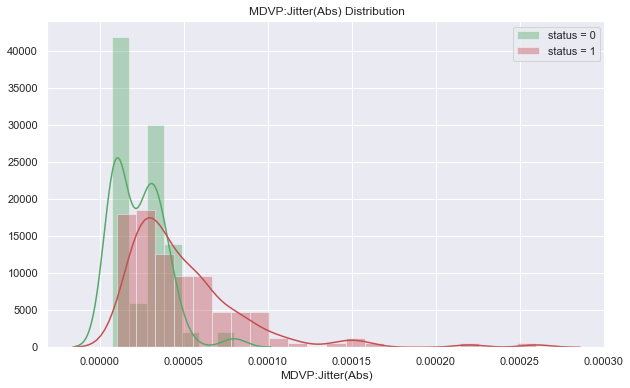

In [275]:
# Plotting a graph for visual analysis of feature MDVP:Jitter(Abs)

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Jitter(Abs)'], kde=True, color='g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Jitter(Abs)'], kde=True, color='r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Jitter(Abs) Distribution');

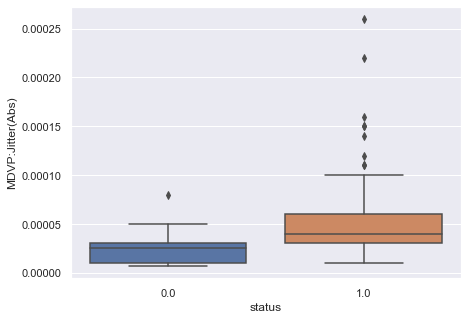

In [276]:
# Boxplot visual analysis of feature MDVP:Jitter(Abs)

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:Jitter(Abs)', data=df);

### C. Analysing MDVP:RAP column.

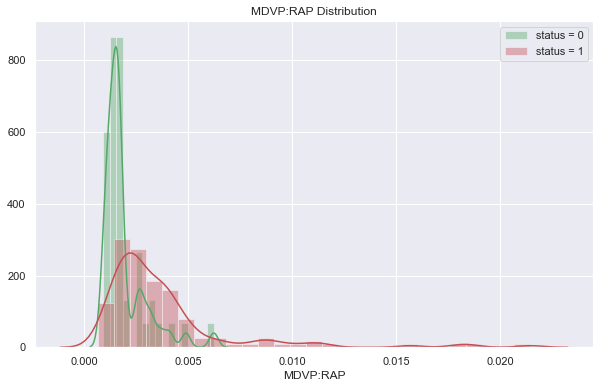

In [277]:
# Plotting a graph for visual analysis of feature MDVP:RAP

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:RAP'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:RAP'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('MDVP:RAP Distribution');

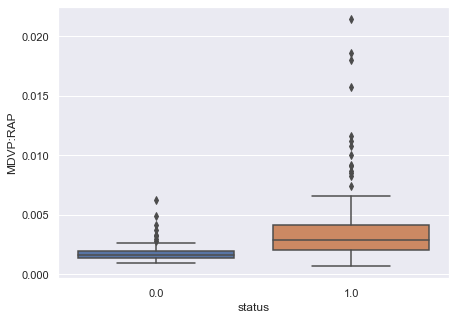

In [278]:
# Boxplot visual analysis of feature MDVP:RAP

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status',  y = 'MDVP:RAP', data=df);

### D. Analysing MDVP:PPQ column.

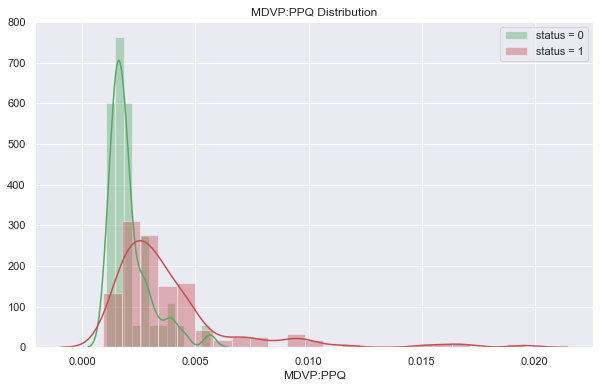

In [279]:
# Plotting a graph for visual analysis of feature MDVP:PPQ

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:PPQ'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:PPQ'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('MDVP:PPQ Distribution');

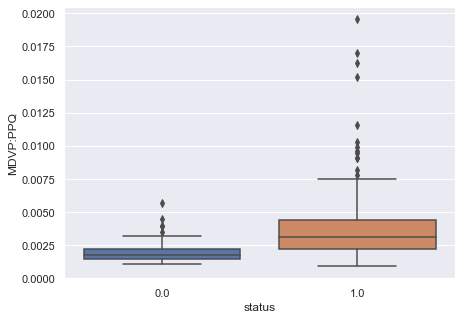

In [280]:
# Boxplot visual analysis of feature MDVP:PPQ

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:PPQ', data=df);

### E. Analysing Jitter:DDP column.

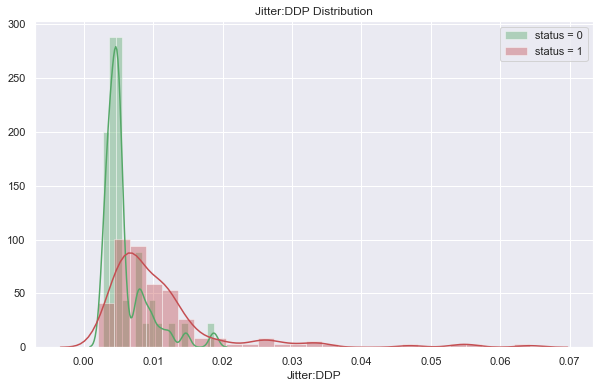

In [281]:
# Plotting a graph for visual analysis of feature Jitter:DDP

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['Jitter:DDP'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['Jitter:DDP'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('Jitter:DDP Distribution');

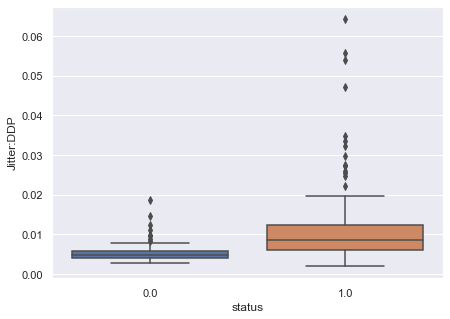

In [282]:
# Boxplot visual analysis of feature Jitter:DDP

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'Jitter:DDP', data=df);

1. In all measures of variation of fundamental frequency, people having parkinsons disease have a wider range.


2. In the lower range of frequencies, there is a complete overlap over each other for both healthy people and those having parkinsons.


3. Very high peaks in healthy people (almost double to that of people with parkinson at its peak frequency), with low dispersion can be seen in case of healthy individuals.

### III ) Analysis of ( Several measures of Variation in Amplitude )

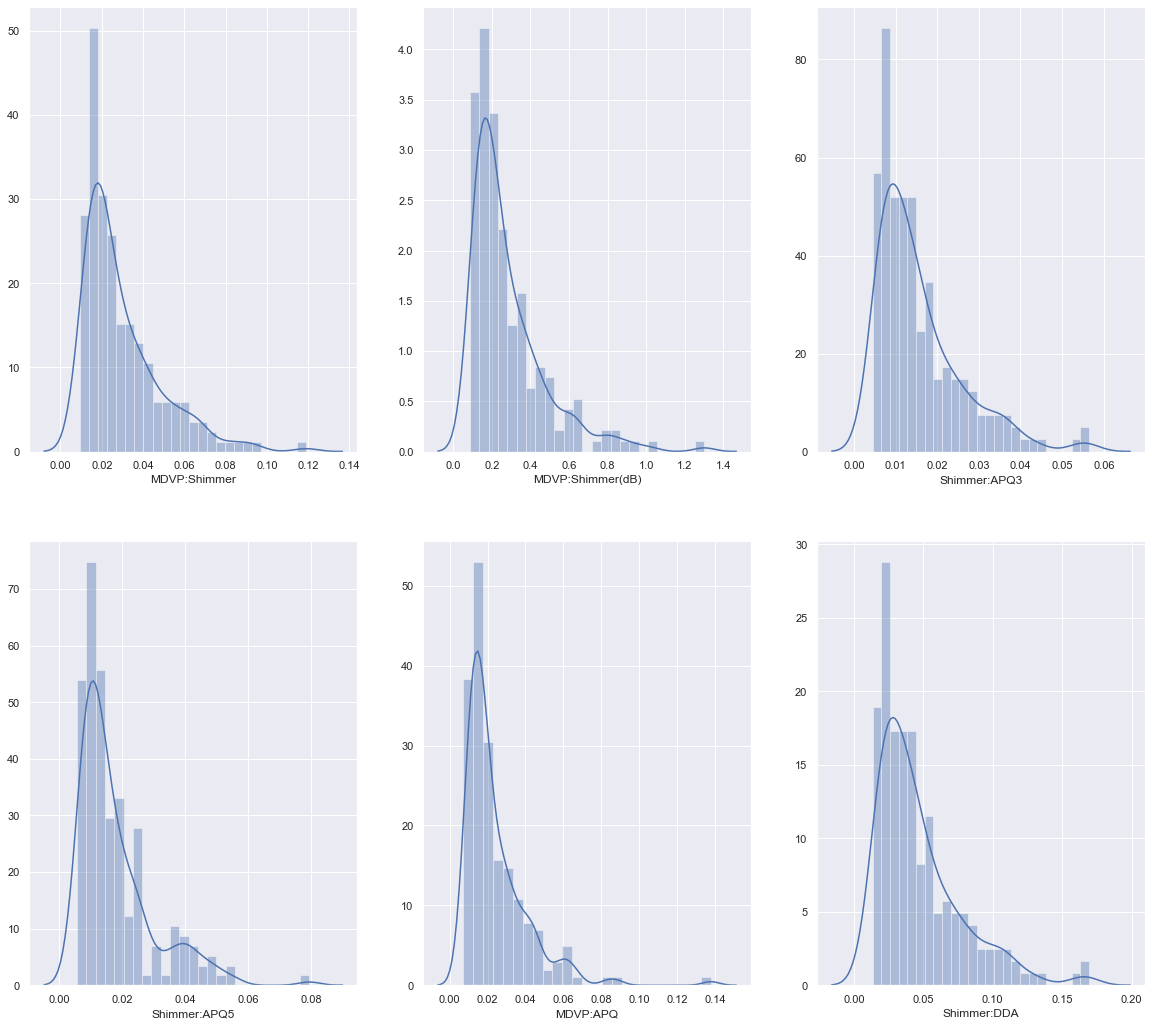

In [283]:
# Visual representation of respective data field features

fig, ax = plt.subplots(2,3, figsize=(20,18))
sns.distplot(df['MDVP:Shimmer'], bins = 25, ax = ax[0,0])
sns.distplot(df['MDVP:Shimmer(dB)'], bins = 25, ax = ax[0,1])
sns.distplot(df['Shimmer:APQ3'], bins = 25, ax = ax[0,2])

sns.distplot(df['Shimmer:APQ5'], bins =25, ax = ax[1,0])
sns.distplot(df['MDVP:APQ'], bins = 25, ax = ax[1,1])
sns.distplot(df['Shimmer:DDA'], bins = 25, ax = ax[1,2]);

Histogram of features, (several measures of variation in amplitude). Visualization through the histogram above shows positive skewness in data.

### A. Analysing MDVP:Shimmer column.

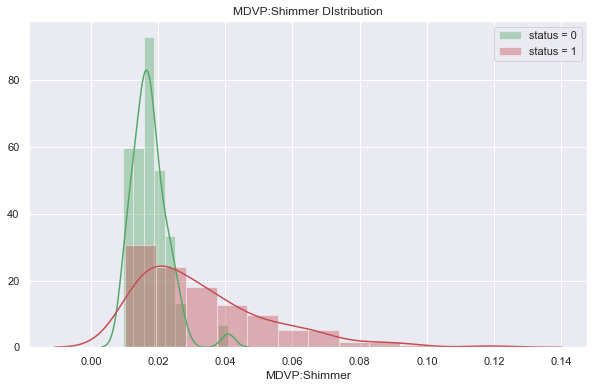

In [284]:
# Plotting a graph for visual analysis of feature MDVP:Shimmer

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Shimmer'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Shimmer'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Shimmer DIstribution');

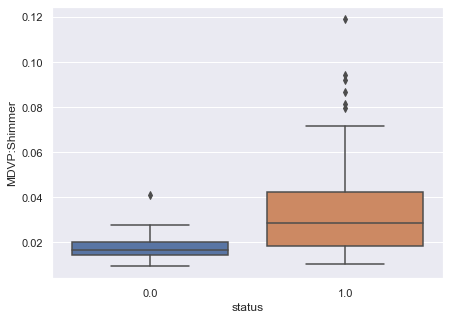

In [285]:
# Boxplot visual analysis of feature MDVP:Shimmer

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:Shimmer', data=df);

### B. Analysing MDVP:Shimmer(dB) column.

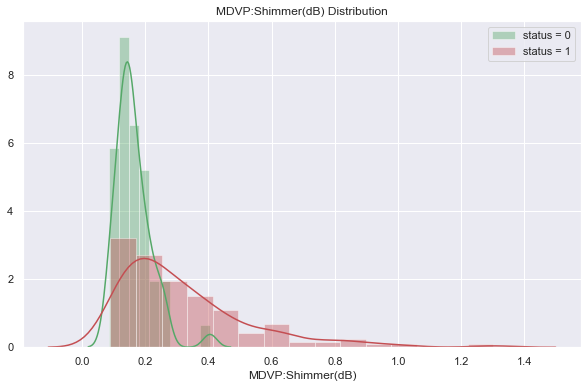

In [286]:
# Plotting a graph for visual analysis of feature MDVP:Shimmer(dB)

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:Shimmer(dB)'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:Shimmer(dB)'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('MDVP:Shimmer(dB) Distribution');

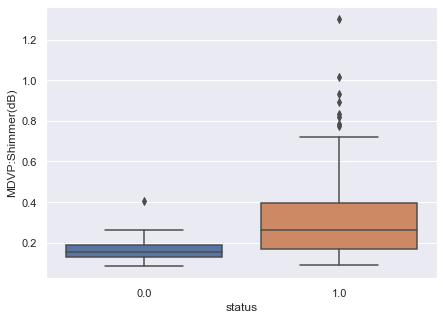

In [287]:
# Boxplot visual analysis of feature MDVP:Shimmer(dB)

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:Shimmer(dB)', data=df);

### C. Analysing Shimmer:APQ3 column.

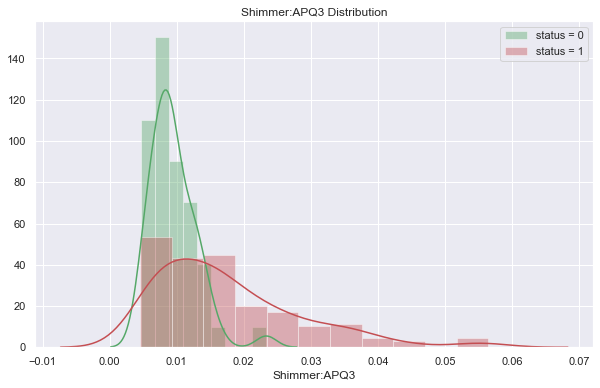

In [288]:
# Plotting a graph for visual analysis of feature Shimmer:APQ3

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['Shimmer:APQ3'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['Shimmer:APQ3'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('Shimmer:APQ3 Distribution');

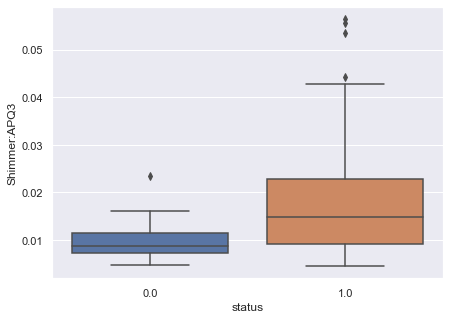

In [289]:
# Boxplot visual analysis of feature Shimmer:APQ3

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'Shimmer:APQ3', data=df);

### D. Analysing Shimmer:APQ5 column.

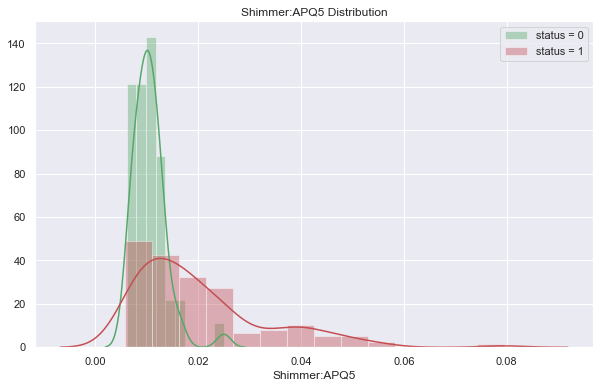

In [290]:
# Plotting a graph for visual analysis of feature Shimmer:APQ5

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['Shimmer:APQ5'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['Shimmer:APQ5'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('Shimmer:APQ5 Distribution');

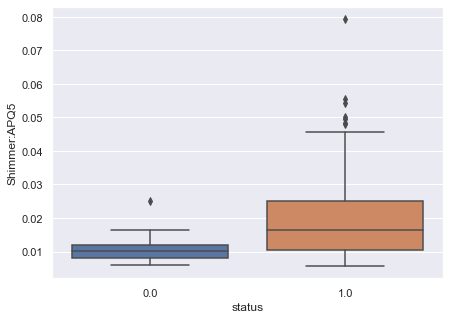

In [291]:
# Boxplot visual analysis of feature Shimmer:APQ5

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'Shimmer:APQ5', data=df);

### E. Analysing MDVP:APQ column.

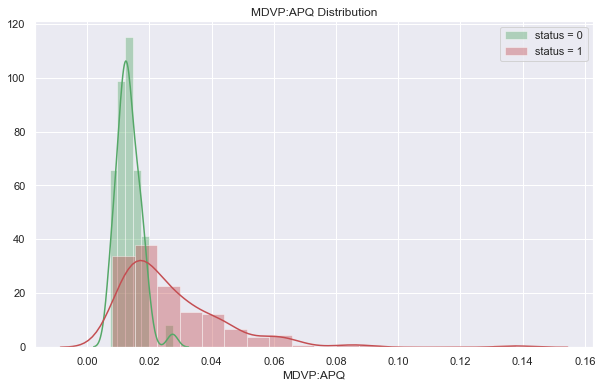

In [292]:
# Plotting a graph for visual analysis of feature MDVP:APQ

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['MDVP:APQ'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['MDVP:APQ'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('MDVP:APQ Distribution');

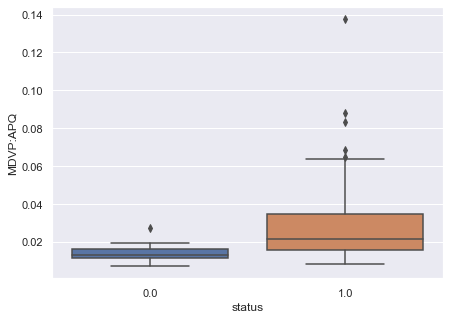

In [293]:
# Boxplot visual analysis of feature MDVP:APQ

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'MDVP:APQ', data=df);

### F. Analysing Shimmer:DDA column.

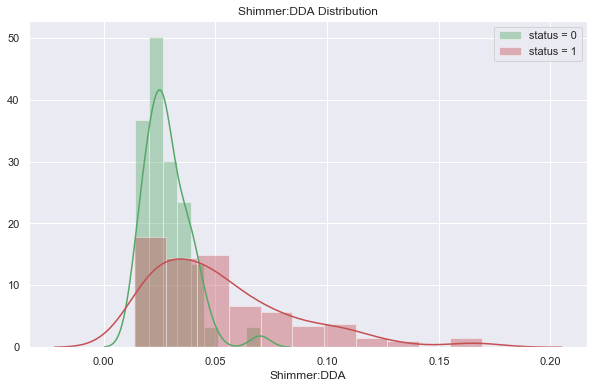

In [294]:
# Plotting a graph for visual analysis of feature Shimmer:DDA

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['Shimmer:DDA'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['Shimmer:DDA'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('Shimmer:DDA Distribution');

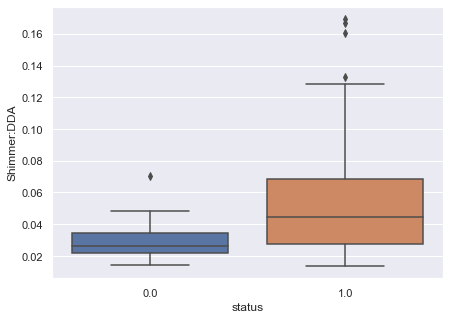

In [295]:
# Boxplot visual analysis of feature Shimmer:DDA

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'Shimmer:DDA', data=df);

1. In all measures of variation in amplitude, people having parkinsons disease have a wider range.


2. In the lower range of amplitude, there is a complete overlap over each other for both healthy people and those having parkinsons.


3. Very high peaks in healthy people (almost double to that of people with parkinson at its peak frequency), with low dispersion can be seen in case of healthy individuals.

### IV ) Analysis of ( Two Measures of Ration of Noise to Tonal Components in the Voice )

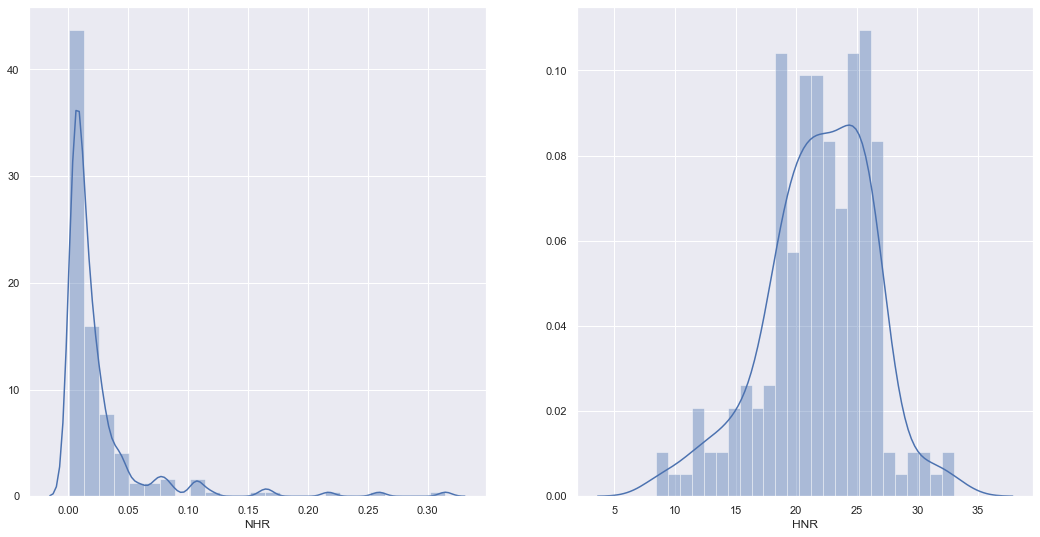

In [296]:
# Visual representation of respective data field features

fig, ax = plt.subplots(1,2, figsize=(18,9))
sns.distplot(df['NHR'], bins = 25, ax = ax[0])
sns.distplot(df['HNR'], bins = 25, ax = ax[1]);

Visualization through histogram above shows positive skewness in (NHR) and sighlty negative skewness in (HNR).

### A. Analysing NHR column.

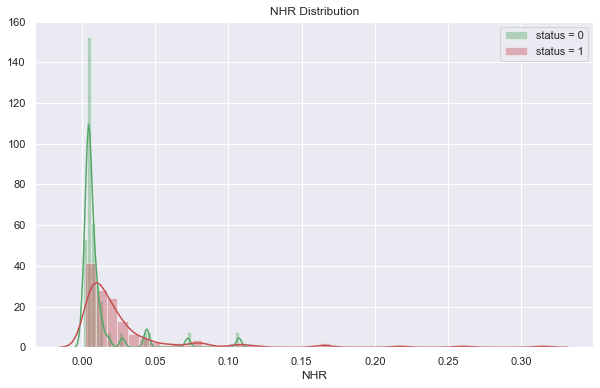

In [297]:
# Plotting a graph for visual analysis of feature NHR

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['NHR'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['NHR'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('NHR Distribution');

Healthy people have a very high peak around(NHR = 0.1).

People with (NHR > 0.2) have a higher probablity of having parkinsons disease. 

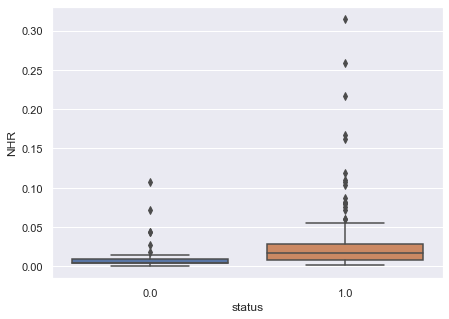

In [298]:
# Boxplot visual analysis of feature NHR

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status',  y = 'NHR', data=df);

Individuals with Parkinsons Disease have a wider range.

### B. Analysing HNR column.

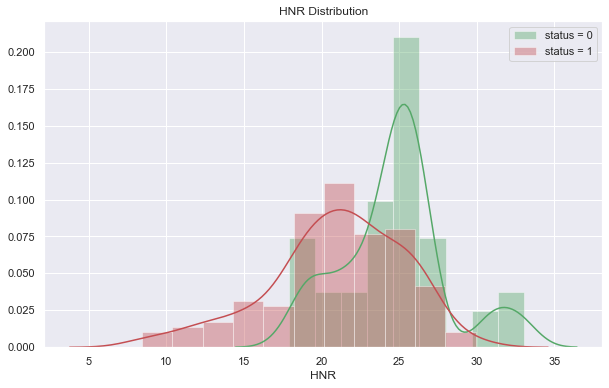

In [299]:
# Plotting a graph for visual analysis of feature HNR

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['HNR'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['HNR'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('HNR Distribution');

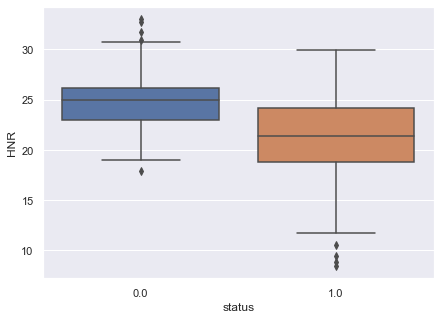

In [300]:
# Boxplot visual analysis of feature HNR

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'HNR', data=df);

Individuals in the rage of (18-25) have a highger probablity of getting parkinsons disease.

### V ) Analysis of ( Two Nonlinear Dynamical Complexity Measures )

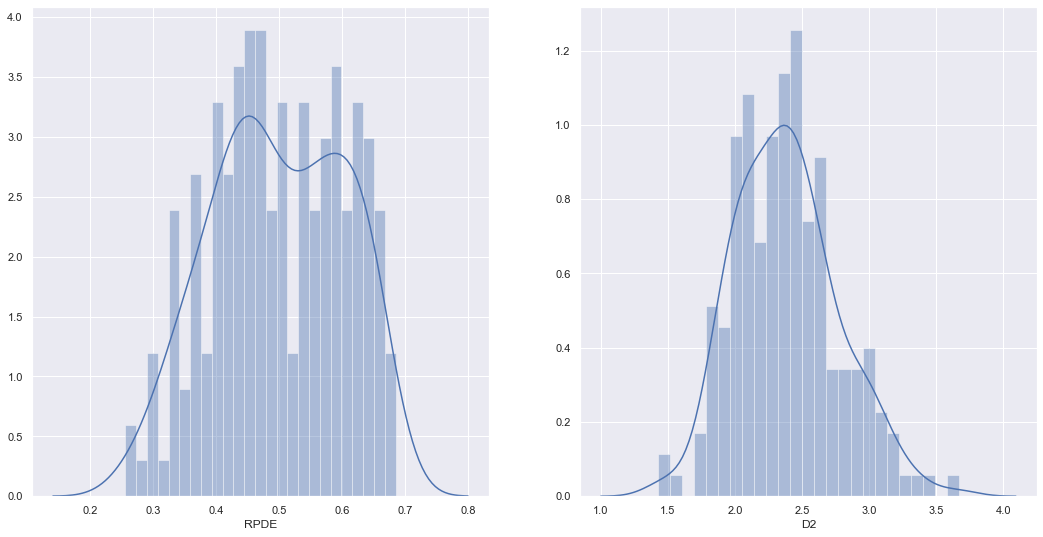

In [301]:
# Visual representation of respective data field features

fig, ax = plt.subplots(1,2, figsize=(18,9))
sns.distplot(df['RPDE'], bins = 25, ax = ax[0])
sns.distplot(df['D2'], bins = 25, ax = ax[1]);

Visualization through the histogram above shows us that (D2) alomst resembles a normal distribution & (RPDE) is positively skewed.

### A. Analysing RPDE column.

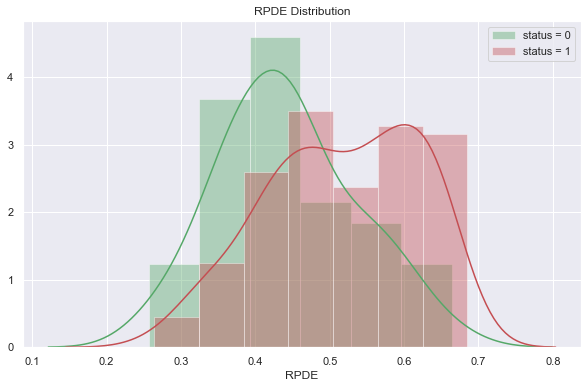

In [302]:
# Plotting a graph for visual analysis of feature RPDE

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['RPDE'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['RPDE'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('RPDE Distribution');

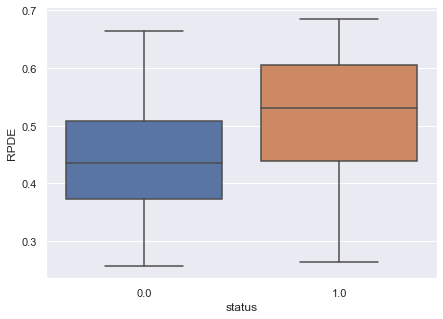

In [303]:
# Boxplot visual analysis of feature RPDE

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'RPDE', data=df);

### B. Analysing D2 column.

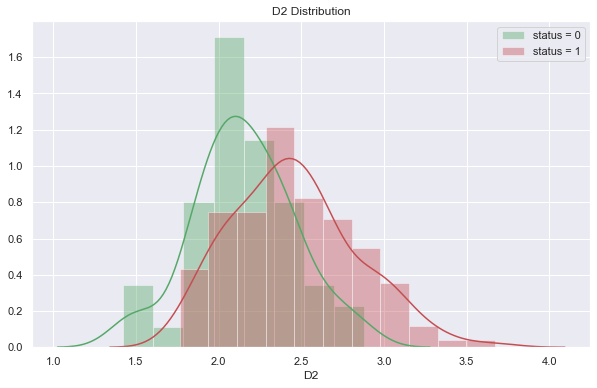

In [304]:
# Plotting a graph for visual analysis of feature D2

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['D2'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['D2'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('D2 Distribution');

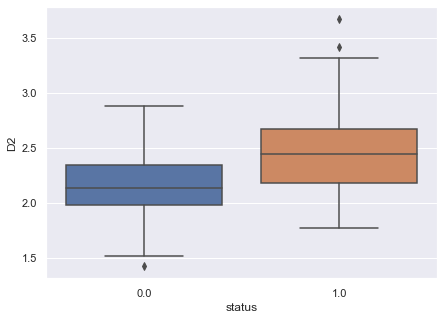

In [305]:
# Boxplot visual analysis of feature D2

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'D2', data=df);

Peak of distribution very close and dispersion range very similar in terms of healthy individuals and those with parkinsons disease.

### VI ) Analysis of ( Three Nonlinear  Measures of Fundamental Frequency Variation )

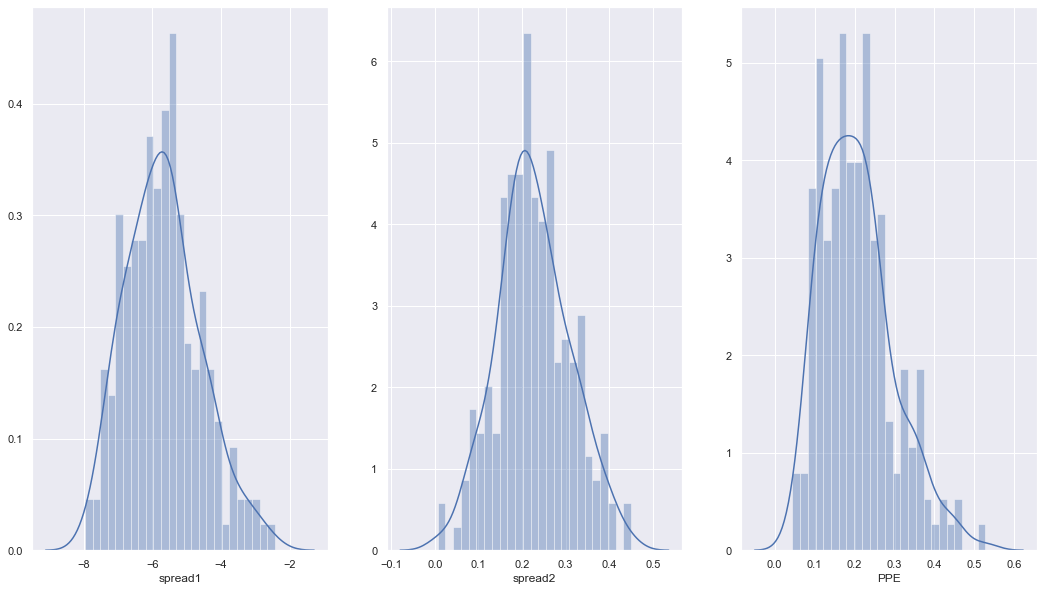

In [306]:
# Visual representation of respective data field features

fig, ax = plt.subplots(1,3, figsize=(18,10))
sns.distplot(df['spread1'], bins = 25, ax = ax[0])
sns.distplot(df['spread2'], bins = 25, ax = ax[1])
sns.distplot(df['PPE'], bins = 25, ax = ax[2]);

Visualization through the histogram above shows us that (spread1) &       (spread2) are almost normally distributed, whereas (PPE) is positively distributed.

### A. Analysing spread1 column.

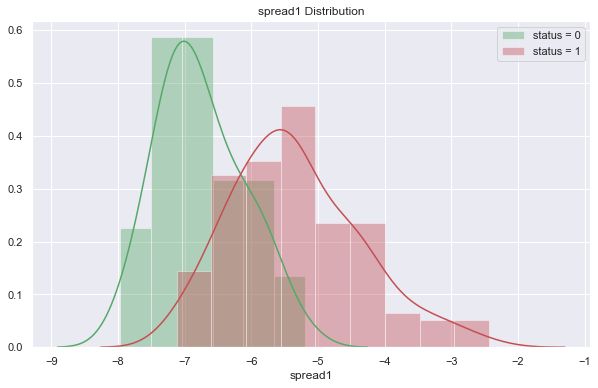

In [307]:
# Plotting a graph for visual analysis of feature spread1

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['spread1'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['spread1'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('spread1 Distribution');

People with spread1 value (< - 5.0) have higher probability of getting parkinsons disease.

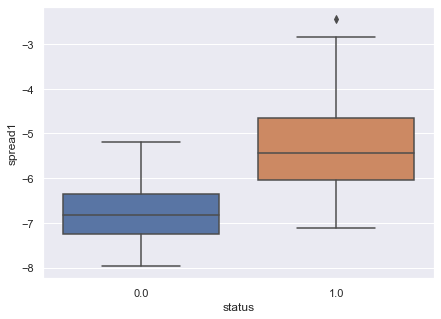

In [308]:
# Boxplot visual analysis of feature spread1

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'spread1', data=df);

### B. Analysing spread2 column.

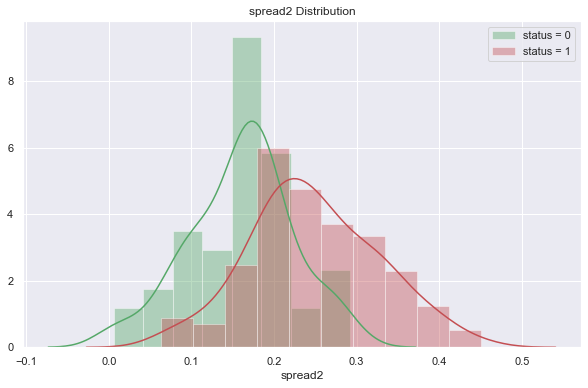

In [309]:
# Plotting a graph for visual analysis of feature spread2

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['spread2'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['spread2'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('spread2 Distribution');

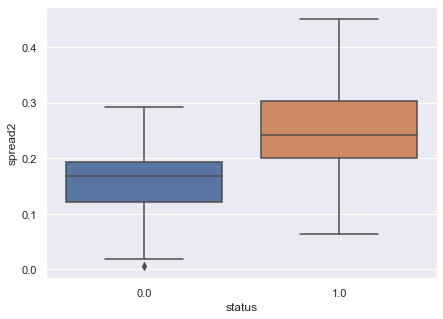

In [310]:
# Boxplot visual analysis of feature spread2

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'spread2', data=df);

Frequency variation range of people with parkinsons is more and wide spread, even though peaks of distributions are quite close.

### C. Analysing PPE column.

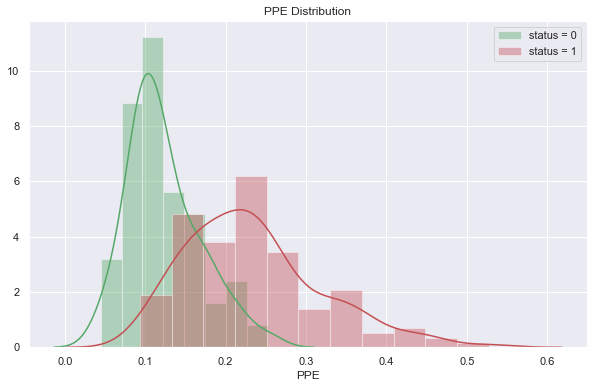

In [311]:
# Plotting a graph for visual analysis of feature PPE

plt.figure(figsize=(10,6))
sns.distplot(df[df['status'] == 0]['PPE'], kde=True, color = 'g', label = 'status = 0')
sns.distplot(df[df['status'] == 1]['PPE'], kde=True, color = 'r', label = 'status = 1')
plt.legend()
plt.title('PPE Distribution');

Peak of distribution for healthy people is at (0.1) and for people with Parkinsons is between (0.2 - 0.25).

Although peak of healthy people is double in size to that of people with parkinsons, despite that there are lower number of healthy people in the sample population.

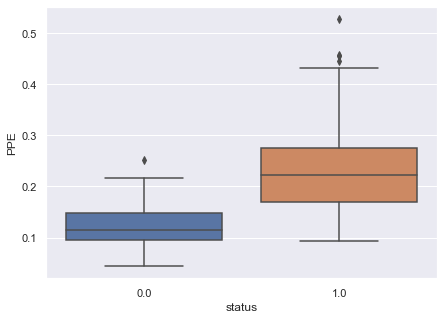

In [312]:
# Boxplot visual analysis of feature PPE

plt.figure(figsize=(7,5))
sns.boxplot(x = 'status', y = 'PPE', data=df);

PPE of healthy people end near the median of PPE of people with Parkinsons(at around 0.2)

Individuals with PPE value (> 0.2) have high probability of having parkinsons disease.

In [313]:
df.corr()     # Finding the correlation amongst different data features

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

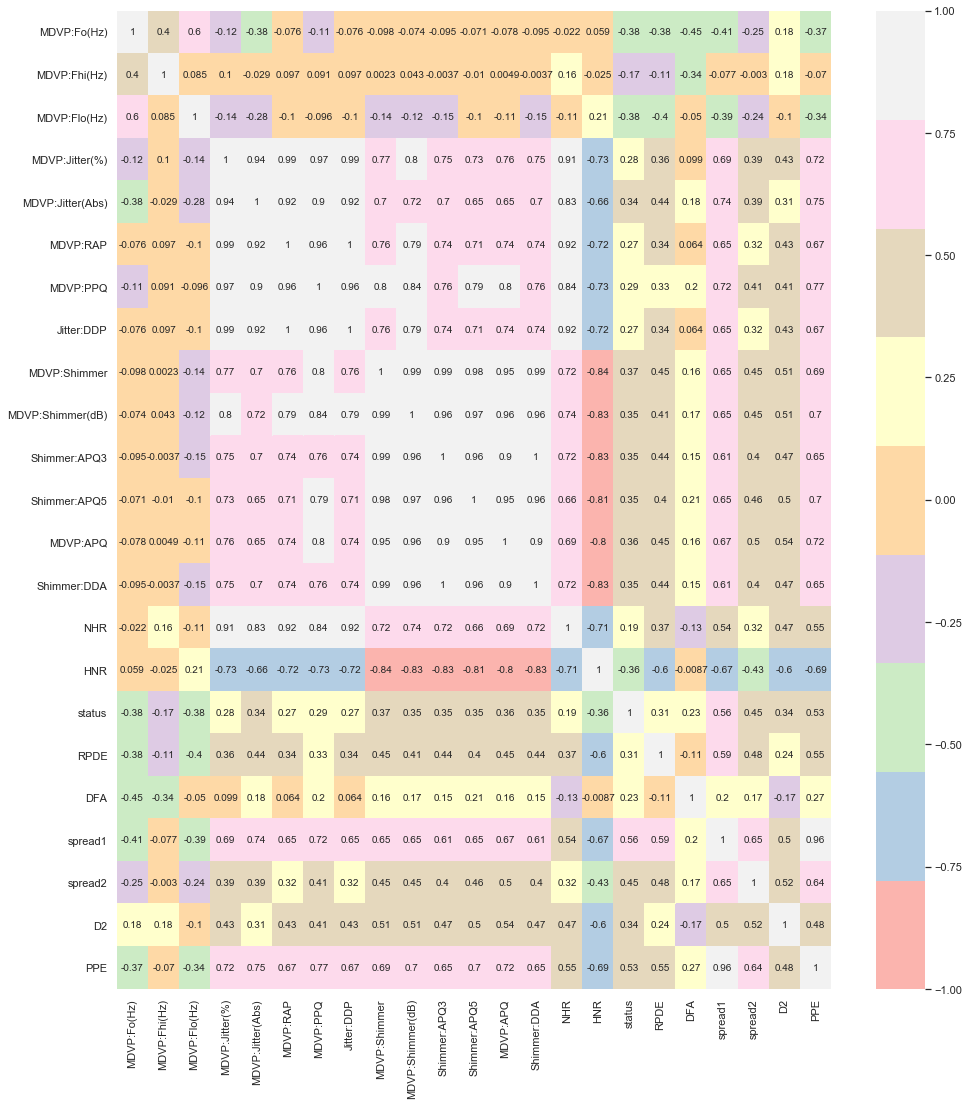

In [314]:
# Visualizing through a graph the different correlations in the data

plt.figure(figsize=(16,18))
corr = df.corr()
sns.heatmap(corr, annot= True, vmin=-1, vmax=1, cmap = 'Pastel1');

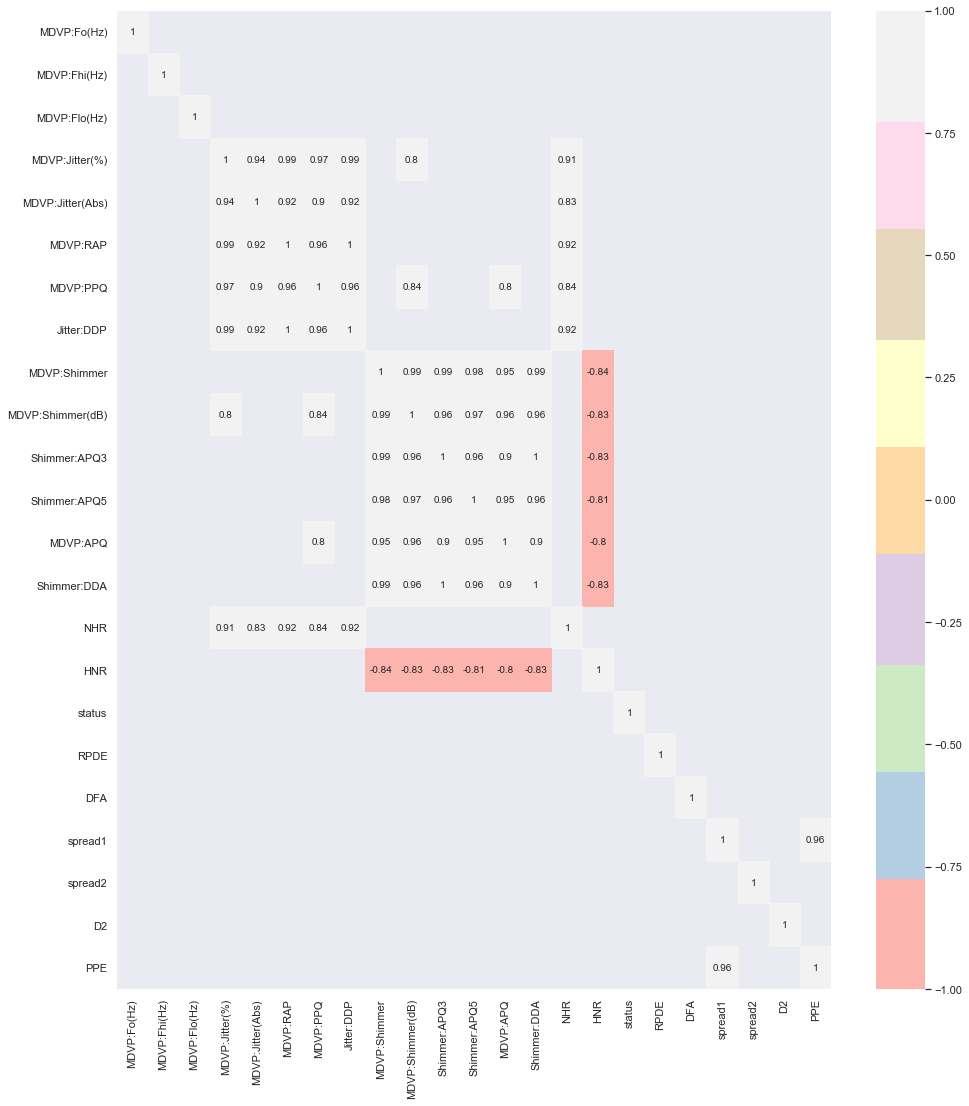

In [315]:
# Finding highly correlated features

corr_pos = corr.abs()
mask = (corr_pos < 0.8)
fig, ax = plt.subplots(figsize=[16,18])
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, mask = mask, cmap = 'Pastel1');

1. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP are highly correlated to NHR.


2. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDAm are highly correlated to HNR.


3. Speard1 and PPE are highly correlated. 


4. Status does not have any strong correlation with any variable.

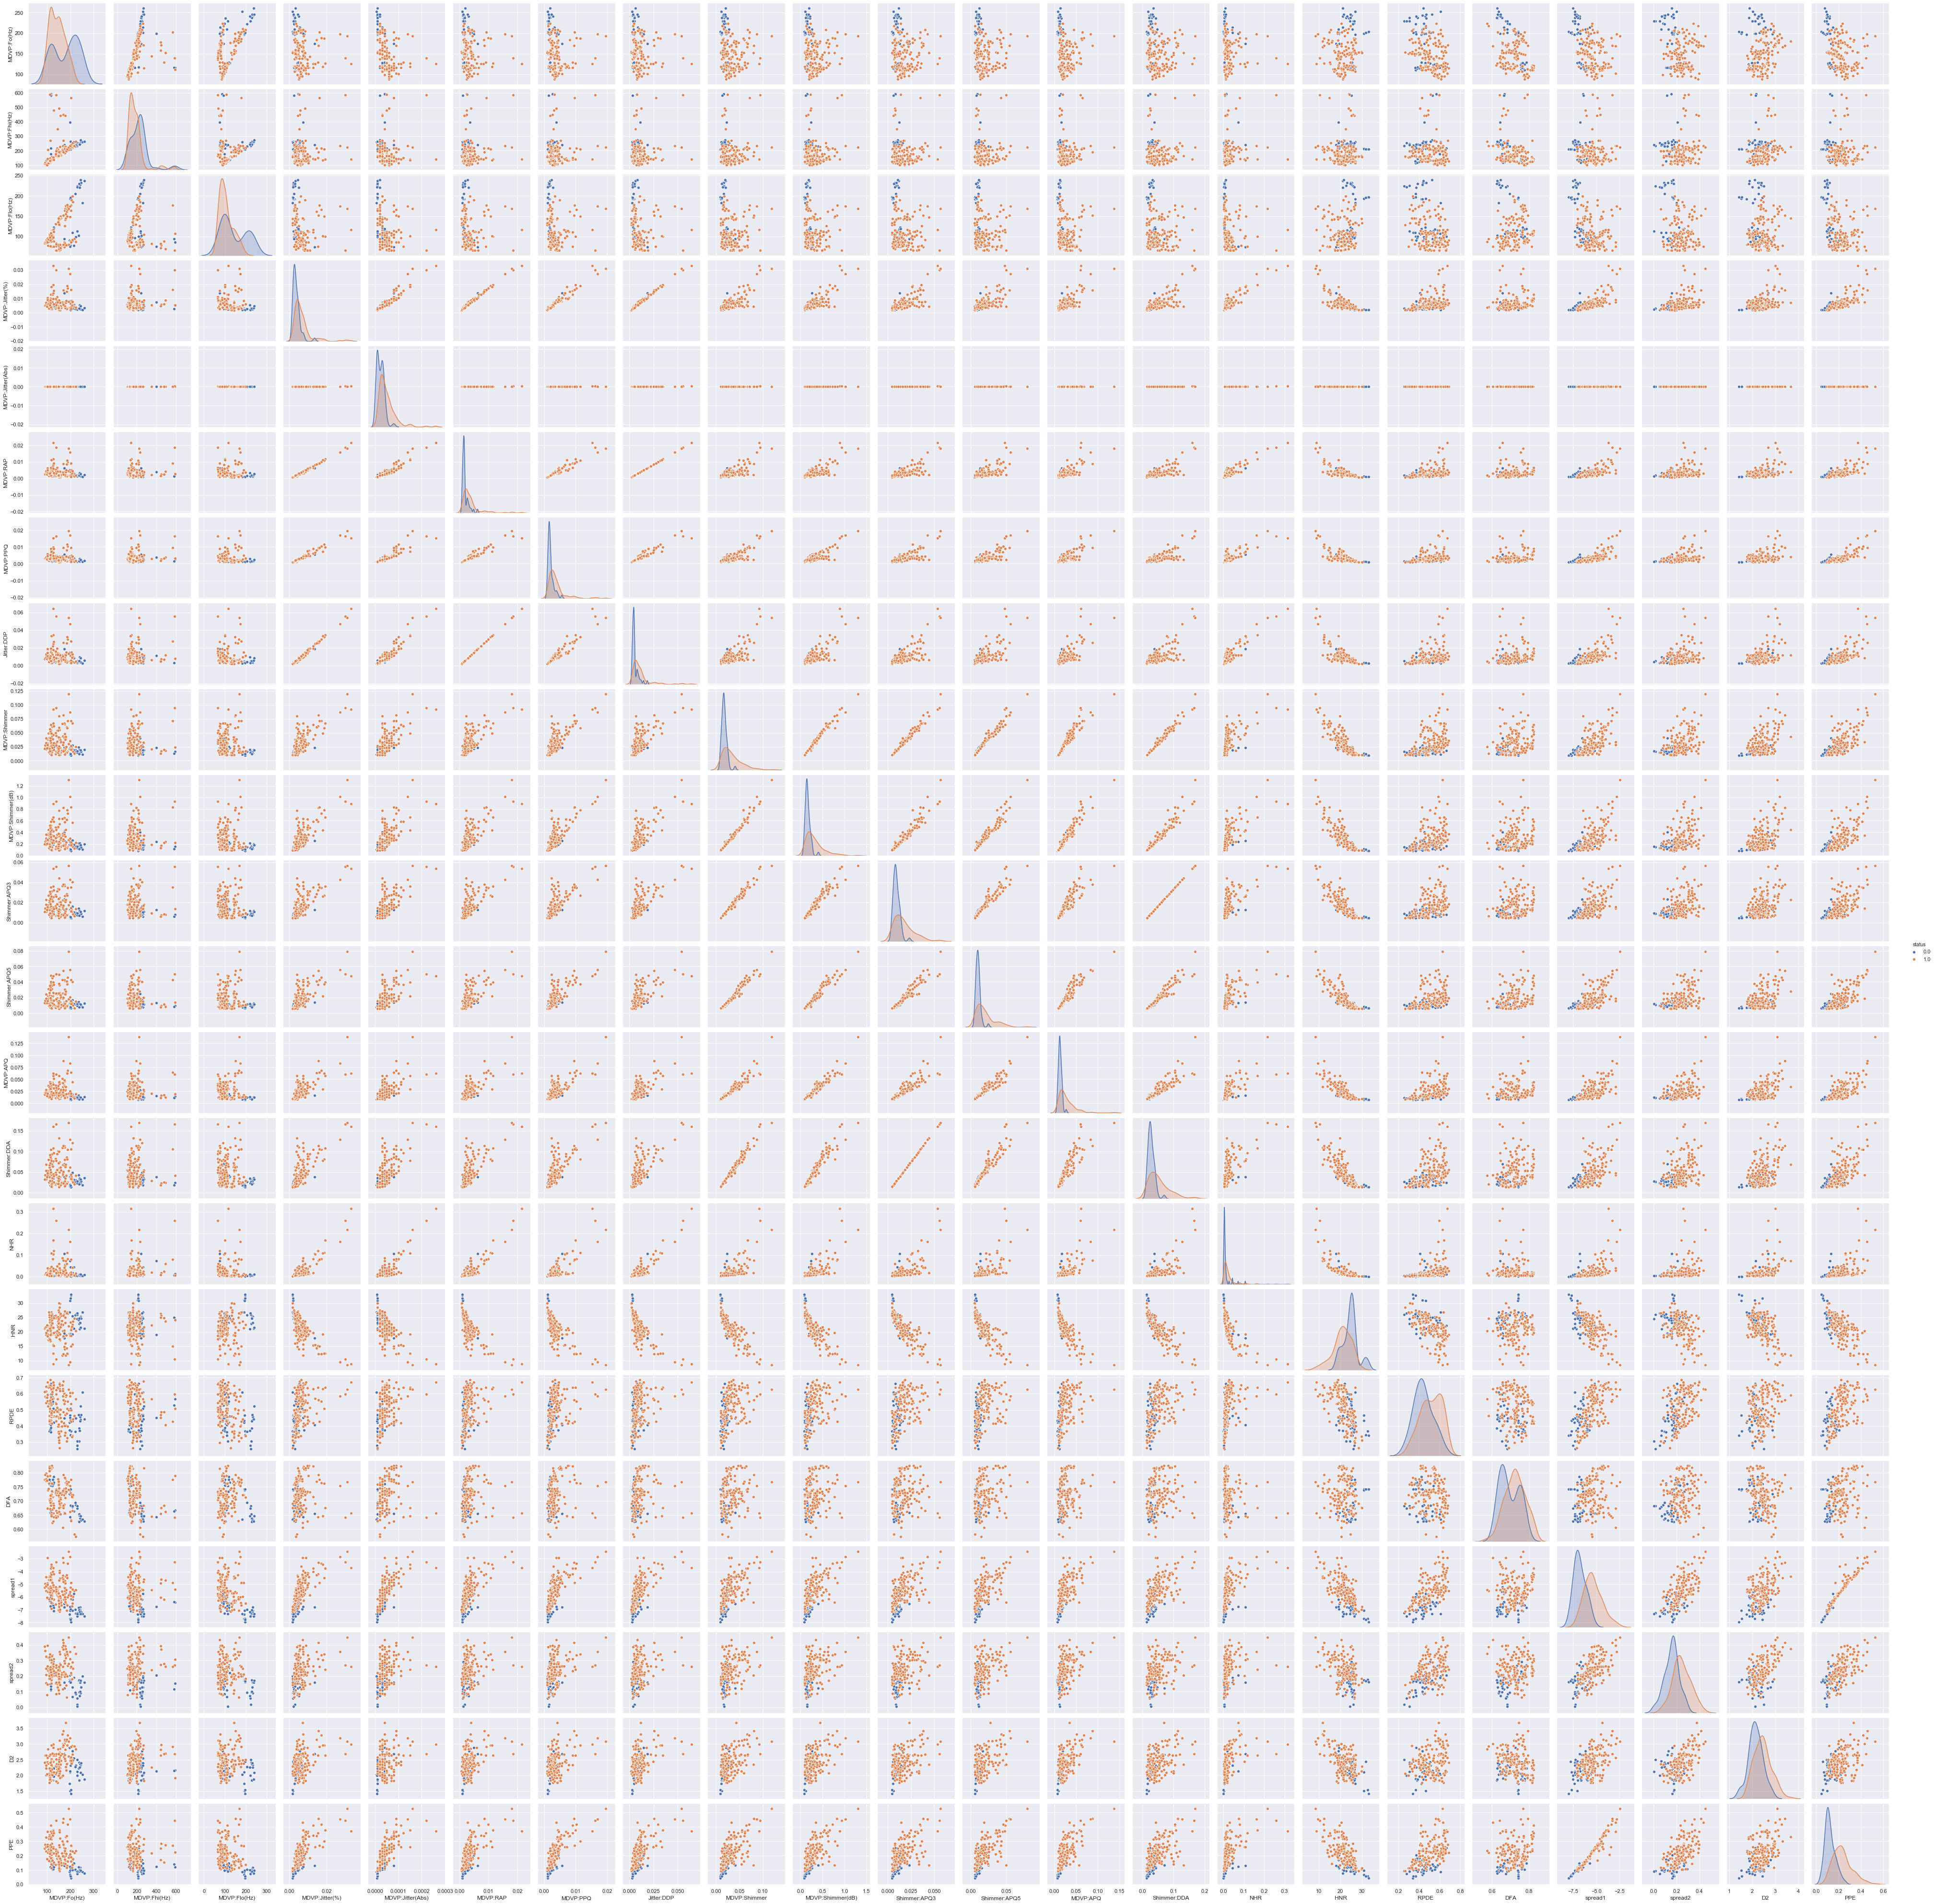

In [316]:
# Visualizing a pair plot for the data.

sns.pairplot(df, diag_kind='kde', hue = 'status');     

### 4. Split the dataset into training and test set in the ratio 70:30

In [318]:
# Train and Test split

x = df.drop(['status', 'name'], axis=1)      # Dropping certain fields from independent variables
y = df[['status']]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.30)

In [319]:
# Checking split data into train and test data sets 

print('{0:2.2f}% Data in Train Set'.format((len(x_train)/len(df.index))*100))
print('{0:2.2f}% Data in Test Set'. format((len(x_test)/len(df.index))*100))

69.74% Data in Train Set
30.26% Data in Test Set


In [320]:
x_train.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
42       237.226       247.326       225.227         0.00298   
17       168.778       232.181        75.603         0.00718   
5        120.552       131.162       113.787         0.00968   
120      128.940       479.697        88.251         0.00581   
98       125.791       140.557        96.206         0.01378   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
42            0.00001   0.00169   0.00182     0.00507       0.01752   
17            0.00004   0.00284   0.00387     0.00853       0.03327   
5             0.00008   0.00463   0.00750     0.01388       0.04701   
120           0.00005   0.00241   0.00314     0.00723       0.02008   
98            0.00011   0.00826   0.00655     0.02478       0.04689   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
42              0.164  ...   0.01133      0.03104  0.00740  22.736  0.305062   
17              0.348  ...   0.03430      0.04322  0.02919  20.376  0.631099   
5               0.456  ...   0.03243      0.06985  0.01222  21.378  0.415564   
120             0.221  ...   0.01734      0.02548  0.02350  24.743  0.487756   
98              0.422  ...   0.03908      0.07625  0.10323  15.433  0.571010   

          DFA   spread1   spread2        D2       PPE  
42   0.654172 -7.310550  0.098648  2.416838  0.095032  
17   0.605417 -2.931070  0.434326  3.007463  0.430788  
5    0.825069 -4.242867  0.299111  2.187560  0.357775  
120  0.684130 -6.186128  0.279933  2.686240  0.152428  
98   0.690892 -5.159169  0.202146  2.441612  0.260375  

[5 rows x 22 columns]

In [321]:
x_train.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   136.000000    136.000000    136.000000      136.000000   
mean    152.747022    188.958868    118.494412        0.006542   
std      40.922701     83.133712     42.314584        0.005442   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.721000    133.047500     87.411000        0.003545   
50%     146.658500    165.363500    106.185500        0.004955   
75%     180.393000    217.986500    142.761250        0.007203   
max     245.510000    592.030000    232.483000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        136.000000  136.000000  136.000000  136.000000    136.000000   
mean           0.000046    0.003517    0.003641    0.010552      0.031526   
std            0.000038    0.003338    0.003086    0.010014      0.020272   
min            0.000009    0.000680    0.000920    0.002040      0.009580   
25%            0.000020    0.001690    0.001935    0.005070      0.016598   
50%            0.000035    0.002500    0.002800    0.007500      0.023525   
75%            0.000060    0.003895    0.003912    0.011690      0.040500   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        136.000000  ...  136.000000   136.000000  136.000000  136.000000   
mean           0.301279  ...    0.025648     0.049801    0.027268   21.557434   
std            0.212990  ...    0.018540     0.032521    0.045158    4.540023   
min            0.085000  ...    0.007260     0.013640    0.000650    8.441000   
25%            0.153500  ...    0.013160     0.025788    0.005803   18.929750   
50%            0.226000  ...    0.018855     0.039155    0.011795   22.000000   
75%            0.371750  ...    0.032257     0.065492    0.026390   24.956000   
max            1.302000  ...    0.137780     0.169420    0.314820   33.047000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000  
mean     0.500994    0.720844   -5.639028    0.225358    2.394157    0.210577  
std      0.109640    0.054109    1.089056    0.084594    0.391343    0.091207  
min      0.256570    0.605417   -7.964984    0.006274    1.423287    0.044539  
25%      0.415369    0.678638   -6.420860    0.175564    2.099870    0.141802  
50%      0.497517    0.725421   -5.685711    0.220753    2.395272    0.198212  
75%      0.600247    0.763035   -5.103933    0.279972    2.643197    0.252692  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 22 columns]

### 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any)

In [322]:
scaler = preprocessing.StandardScaler()         # Creating the scalar object
x_train_scaled = scaler.fit_transform(x_train)      # Fitting train data on scaled object
x_test_scaled = scaler.fit_transform(x_test)        # Fitting test data on scaled object

In [323]:
x_train.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

We can see from the above result that the data has no missing values, hence we will go ahead with just scaling the dataset.

### 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data.

### A. Logistic Regression Model Building.

In [324]:
logmod = LogisticRegression(max_iter = 1000)
logmod.fit(x_train_scaled, y_train.values.ravel())        # Fitting model on training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [325]:
logmod.score(x_train_scaled, y_train)    # Training data score

0.9044117647058824

In [326]:
for idx, col_name in enumerate (x_train.columns):
    print('The Coefficient for {} is {}'.format(col_name, logmod.coef_[0][idx]))

The Coefficient for MDVP:Fo(Hz) is -0.5408231309293036
The Coefficient for MDVP:Fhi(Hz) is -0.33444912942390737
The Coefficient for MDVP:Flo(Hz) is -0.00046972114901411304
The Coefficient for MDVP:Jitter(%) is -0.4960241152427931
The Coefficient for MDVP:Jitter(Abs) is -0.5176632047167707
The Coefficient for MDVP:RAP is 0.3217046872425876
The Coefficient for MDVP:PPQ is -0.07147201743557972
The Coefficient for Jitter:DDP is 0.3216160720533936
The Coefficient for MDVP:Shimmer is 0.25449984620377747
The Coefficient for MDVP:Shimmer(dB) is 0.2619569450057653
The Coefficient for Shimmer:APQ3 is 0.06434922263704158
The Coefficient for Shimmer:APQ5 is 0.24823306829719488
The Coefficient for MDVP:APQ is 0.3295332759153477
The Coefficient for Shimmer:DDA is 0.06388310356769682
The Coefficient for NHR is -0.15360672505650716
The Coefficient for HNR is 0.09395943461806872
The Coefficient for RPDE is -0.2229193012808253
The Coefficient for DFA is 0.26055598675067915
The Coefficient for spread1 is

Coefficient of each variable is described above.

In [327]:
intercept = logmod.intercept_[0]
print('The intercept of our model is {}'.format(intercept))      # Findng the intercept of our model

The intercept of our model is 2.9223050806915274


In [328]:
y_pred = logmod.predict(x_test_scaled)
logmod_acc = accuracy_score(y_test, y_pred)    # Getting accuracy score of model on test data
logmod_F1 = f1_score(y_test, y_pred)           # Getting f1 score of the model
logmod_AUC = roc_auc_score(y_test, y_pred)       # Getting area under curve score
logmod_rec = recall_score(y_test, y_pred)       # Getting recall score of the model
logmod_conf = confusion_matrix(y_test, y_pred)        # Visualizing the confusion matrix
logmod_classrep = classification_report(y_test, y_pred)       # Visualizing the classification report

In [329]:
print('The Accuracy Score of the model is {0:.2f}%'.format(logmod_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'.format(logmod_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'.format(logmod_rec*100))
print()
print('AUC score of the model is {0:.2f}%'.format(logmod_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', logmod_conf)
print()
print('Deatiled Classification Report of the model is :\n', logmod_classrep)

The Accuracy Score of the model is 83.05%

The F1 score of the model is 88.64%

The Recall score of the model is 97.50%

AUC score of the model is 75.07%

The Confusion Matrix of the model is :
 [[10  9]
 [ 1 39]]

Deatiled Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.91      0.53      0.67        19
         1.0       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



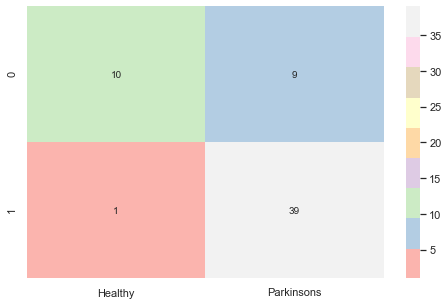

In [330]:
# Plotting confusion matrix graphically

cm = metrics.confusion_matrix(y_test, y_pred, labels = [0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],
                    columns = [i for i in ['Healthy', 'Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm, annot=True, cmap='Pastel1', fmt='g');

### B. K-NN Model Building.

In [331]:
KNNmod = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
KNNmod.fit(x_train_scaled, y_train.values.ravel())      # Fitting model on training data set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [332]:
KNNmod.score(x_train_scaled, y_train)       # Training data score

1.0

In [333]:
ypred = KNNmod.predict(x_test_scaled)
KNNmod_acc = accuracy_score(y_test, ypred)        # Getting accuracy score of the model on test data
KNNmod_F1 = f1_score(y_test, ypred)               # Getting f1 score of the model
KNNmod_rec = recall_score(y_test, ypred)          # Getting recall score of the model
KNNmod_AUC = roc_auc_score(y_test, ypred)         # Finding score of area under curve
KNNmod_conf = confusion_matrix(y_test, ypred)     # Visualizing the confusion matrix of the model
KNNmod_class = classification_report(y_test, ypred)        # Visualizing the classification report of the model

In [334]:
print('The Accuracy Score of the model is {0:.2f}%'. format(KNNmod_acc*100))
print()
print('The F1 Score of the model is {0:.2f}%'. format(KNNmod_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(KNNmod_rec*100))
print()
print('AUC score of the model is {0:.2f}%'. format(KNNmod_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', KNNmod_conf)
print()
print('Detailed Classification Report of the model is :\n', KNNmod_class)

The Accuracy Score of the model is 91.53%

The F1 Score of the model is 93.83%

The Recall Score of the model is 95.00%

AUC score of the model is 89.61%

The Confusion Matrix of the model is :
 [[16  3]
 [ 2 38]]

Detailed Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        19
         1.0       0.93      0.95      0.94        40

    accuracy                           0.92        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.92      0.91        59



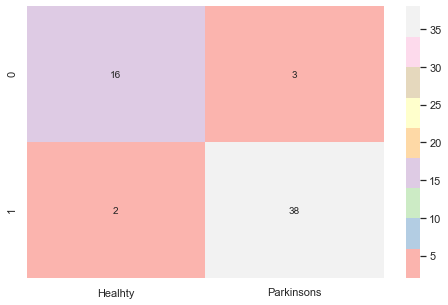

In [335]:
# Plotting confusion matrix graphically

cm1 = metrics.confusion_matrix(y_test, ypred, labels = [0,1])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healhty', 'Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm1, annot=True, cmap = 'Pastel1', fmt='g');

### C. Naive Bayes Model Building.

In [336]:
gaumod = GaussianNB()
gaumod.fit(x_train_scaled, y_train.values.ravel())     # Fitting model on training data set

GaussianNB(priors=None, var_smoothing=1e-09)

In [337]:
gaumod.score(x_train_scaled, y_train)       # Training data score

0.7205882352941176

In [338]:
ypd = gaumod.predict(x_test_scaled)
gaumod_acc = accuracy_score(y_test, ypd)      # Getting accuracy score of model on test data
gaumod_F1 = f1_score(y_test, ypd)             # Getting f1 score of the model
gaumod_rec = recall_score(y_test, ypd)        # Getting recall score of the model
gaumod_AUC = roc_auc_score(y_test, ypd)       # Finding score of area under curve 
gaumod_conf = confusion_matrix(y_test, ypd)     # Visualizing the confusion matrix of the model
gaumod_class = classification_report(y_test, ypd)      # Visualizing the classification report of the model

In [339]:
print('The Accuracy Score of the model is {0:.2f}%'. format(gaumod_acc*100))
print()
print('The F1 Score of the model is {0:.2f}%'. format(gaumod_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(gaumod_rec*100))
print()
print('AUC score of the model is {0:.2f}%'. format(gaumod_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', gaumod_conf)
print()
print('The Classification Report of the model is :\n', gaumod_class)

The Accuracy Score of the model is 66.10%

The F1 Score of the model is 72.22%

The Recall Score of the model is 65.00%

AUC score of the model is 66.71%

The Confusion Matrix of the model is :
 [[13  6]
 [14 26]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.48      0.68      0.57        19
         1.0       0.81      0.65      0.72        40

    accuracy                           0.66        59
   macro avg       0.65      0.67      0.64        59
weighted avg       0.71      0.66      0.67        59



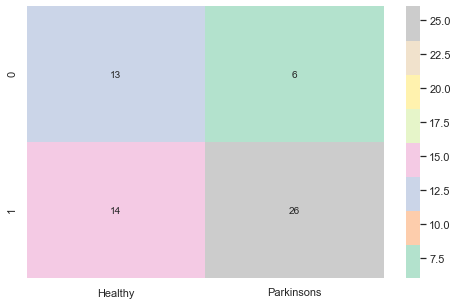

In [340]:
# Plotting confusion matrix graphically

cm2 = metrics.confusion_matrix(y_test, ypd, labels=[0,1])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm2, annot=True, cmap = 'Pastel2', fmt='g');

### D. SVM Model Building.

### 1. SVM - Kernel (Linear)

In [341]:
Svmlinear = svm.SVC(C = 3, gamma = 0.025, kernel='linear')
Svmlinear.fit(x_train_scaled, y_train.values.ravel())       # Fitting model on training data set

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [342]:
Svmlinear.score(x_train_scaled, y_train)     # Training data score

0.9338235294117647

In [344]:
ypre = Svmlinear.predict(x_test_scaled)     
Svmlinear_acc = accuracy_score(y_test, ypre)      # Getting accuracy score of model on test data
Svmlinear_F1 = f1_score(y_test, ypre)             # Getting f1 score of the model
Svmlinear_rec = recall_score(y_test, ypre)        # Getting recall score of the model
Svmlinear_AUC = roc_auc_score(y_test, ypre)       # Finding score of area under curve 
Svmlinear_conf = confusion_matrix(y_test, ypre)     # Visualizing the confusion matrix of the model
Svmlinear_class = classification_report(y_test, ypre)      # Visualizing the classification report of the model

In [345]:
print('The Accuracy Score of the model is {0:.2f}%'. format(Svmlinear_acc*100))
print()
print('The F1 Score of the model is {0:.2f}%'. format(Svmlinear_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(Svmlinear_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(Svmlinear_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', Svmlinear_conf)
print()
print('Detailed Classification Report of the model is :\n', Svmlinear_class)

The Accuracy Score of the model is 86.44%

The F1 Score of the model is 90.70%

The Recall Score of the model is 97.50%

AUC Score of the model is 80.33%

The Confusion Matrix of the model is :
 [[12  7]
 [ 1 39]]

Detailed Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.92      0.63      0.75        19
         1.0       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



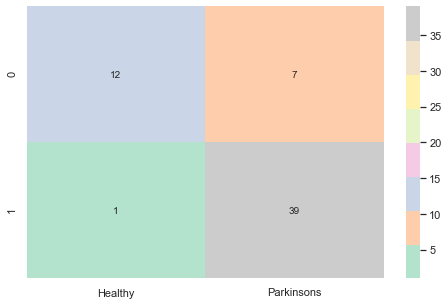

In [346]:
# Plotting confusion matrix graphically

cm3 = metrics.confusion_matrix(y_test, ypre, labels = [0,1])
df_cm3 = pd.DataFrame(cm3, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm3, annot=True, cmap='Pastel2', fmt='g');

### 2. SVM - Kernel (RBF)

In [347]:
Svmrbf = svm.SVC(C = 70, gamma = 0.1, kernel='rbf')
Svmrbf.fit(x_train_scaled, y_train.values.ravel())       # Fitting model on training data set

SVC(C=70, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [348]:
Svmrbf.score(x_train_scaled, y_train)     # Training data score

1.0

In [350]:
ypr = Svmrbf.predict(x_test_scaled)     
Svmrbf_acc = accuracy_score(y_test, ypr)      # Getting accuracy score of model on test data
Svmrbf_F1 = f1_score(y_test, ypr)             # Getting f1 score of the model
Svmrbf_rec = recall_score(y_test, ypr)        # Getting recall score of the model
Svmrbf_AUC = roc_auc_score(y_test, ypr)       # Finding score of area under curve 
Svmrbf_conf = confusion_matrix(y_test, ypr)     # Visualizing the confusion matrix of the model
Svmrbf_class = classification_report(y_test, ypr)      # Visualizing the classification report of the model

In [351]:
print('The Accuracy Score of the model is {0:.2f}%'. format(Svmrbf_acc*100))
print()
print('The F1 Score of the model is {0:.2f}%'. format(Svmrbf_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(Svmrbf_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(Svmrbf_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', Svmrbf_conf)
print()
print('Detailed Classification Report of the model is :\n', Svmrbf_class)

The Accuracy Score of the model is 89.83%

The F1 Score of the model is 93.02%

The Recall Score of the model is 100.00%

AUC Score of the model is 84.21%

The Confusion Matrix of the model is :
 [[13  6]
 [ 0 40]]

Detailed Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        19
         1.0       0.87      1.00      0.93        40

    accuracy                           0.90        59
   macro avg       0.93      0.84      0.87        59
weighted avg       0.91      0.90      0.89        59



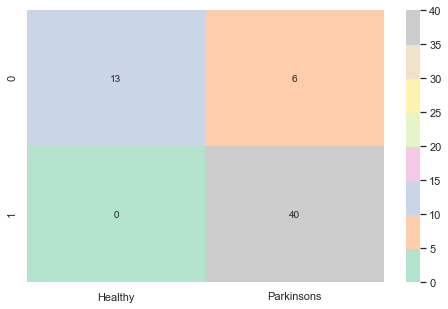

In [352]:
# Plotting confusion matrix graphically

cm4 = metrics.confusion_matrix(y_test, ypr, labels = [0,1])
df_cm4 = pd.DataFrame(cm4, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm4, annot=True, cmap='Pastel2', fmt='g');

### 3. SVM - Kernel (POLY)

In [353]:
Svmpoly = svm.SVC(C = 50, gamma = 0.10, kernel='poly')
Svmpoly.fit(x_train_scaled, y_train.values.ravel())       # Fitting model on training data set

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [354]:
Svmpoly.score(x_train_scaled, y_train)     # Training data score

1.0

In [356]:
y_pr = Svmpoly.predict(x_test_scaled)     
Svmpoly_acc = accuracy_score(y_test, y_pr)      # Getting accuracy score of model on test data
Svmpoly_F1 = f1_score(y_test, y_pr)             # Getting f1 score of the model
Svmpoly_rec = recall_score(y_test, y_pr)        # Getting recall score of the model
Svmpoly_AUC = roc_auc_score(y_test, y_pr)       # Finding score of area under curve 
Svmpoly_conf = confusion_matrix(y_test, y_pr)     # Visualizing the confusion matrix of the model
Svmpoly_class = classification_report(y_test, y_pr)      # Visualizing the classification report of the model

In [357]:
print('The Accuracy Score of the model is {0:.2f}%'. format(Svmpoly_acc*100))
print()
print('The F1 Score of the model is {0:.2f}%'. format(Svmpoly_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(Svmpoly_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(Svmpoly_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', Svmpoly_conf)
print()
print('Detailed Classification Report of the model is :\n', Svmpoly_class)

The Accuracy Score of the model is 81.36%

The F1 Score of the model is 86.75%

The Recall Score of the model is 90.00%

AUC Score of the model is 76.58%

The Confusion Matrix of the model is :
 [[12  7]
 [ 4 36]]

Detailed Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.75      0.63      0.69        19
         1.0       0.84      0.90      0.87        40

    accuracy                           0.81        59
   macro avg       0.79      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59



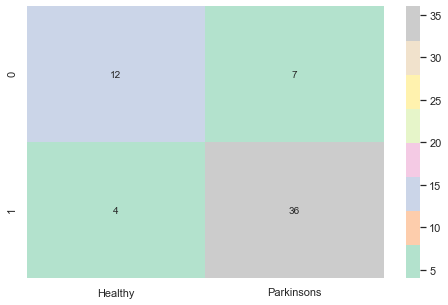

In [358]:
# Plotting confusion matrix graphically

cm5 = metrics.confusion_matrix(y_test, y_pr, labels = [0,1])
df_cm5 = pd.DataFrame(cm5, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm5, annot=True, cmap='Pastel2', fmt='g');

### 4. SVM - Kernel (SIGMOID)

In [359]:
Svmsig = svm.SVC(C = 70, gamma = 0.01, kernel='sigmoid')
Svmsig.fit(x_train_scaled, y_train.values.ravel())       # Fitting model on training data set

SVC(C=70, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [360]:
Svmsig.score(x_train_scaled, y_train)     # Training data score

0.8823529411764706

In [362]:
y_prd = Svmsig.predict(x_test_scaled)     
Svmsig_acc = accuracy_score(y_test, y_prd)      # Getting accuracy score of model on test data
Svmsig_F1 = f1_score(y_test, y_prd)             # Getting f1 score of the model
Svmsig_rec = recall_score(y_test, y_prd)        # Getting recall score of the model
Svmsig_AUC = roc_auc_score(y_test, y_prd)       # Finding score of area under curve 
Svmsig_conf = confusion_matrix(y_test, y_prd)     # Visualizing the confusion matrix of the model
Svmsig_class = classification_report(y_test, y_prd)      # Visualizing the classification report of the model

In [363]:
print('The Accuracy Score of the model is {0:.2f}%'. format(Svmsig_acc*100))
print()
print('The F1 Score of the model is {0:.2f}%'. format(Svmsig_F1*100))
print()
print('The Recall Score of the model is {0:.2f}%'. format(Svmsig_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(Svmsig_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', Svmsig_conf)
print()
print('Detailed Classification Report of the model is :\n', Svmsig_class)

The Accuracy Score of the model is 84.75%

The F1 Score of the model is 89.66%

The Recall Score of the model is 97.50%

AUC Score of the model is 77.70%

The Confusion Matrix of the model is :
 [[11  8]
 [ 1 39]]

Detailed Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.92      0.58      0.71        19
         1.0       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



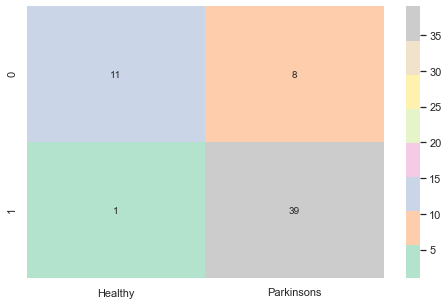

In [395]:
# Plotting confusion matrix graphically

cm6 = metrics.confusion_matrix(y_test, y_prd, labels = [0,1])
df_cm6 = pd.DataFrame(cm6, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm6, annot=True, cmap='Pastel2', fmt='g');

### 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

### A. Decision Tree Model Building.

In [365]:
dtmod = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth = 1)
dtmod.fit(x_train_scaled, y_train.values.ravel())      # Fitting model on training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [366]:
dtmod.score(x_train_scaled, y_train)        # Training data score

0.8897058823529411

In [368]:
y_pre = dtmod.predict(x_test_scaled)
dtmod_acc = accuracy_score(y_test, y_pre)        # Getting accuracy score of model on test data
dtmod_F1 = f1_score(y_test, y_pre)               # Getting f1 score of the model
dtmod_rec = recall_score(y_test, y_pre)          # Getting recall score of the model
dtmod_AUC = roc_auc_score(y_test, y_pre)         # Finding score of area under curve
dtmod_conf = confusion_matrix(y_test, y_pre)      # Visualizing the confusion matrix of the model
dtmod_class = classification_report(y_test, y_pre)        # Visualizing the classification report of the model

In [733]:
print('The Accuracy score of the model is {0:.2f}%'. format(dtmod_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(dtmod_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(dtmod_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(dtmod_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', dtmod_conf)
print()
print('The Classification Report of the model is :\n', dtmod_class)

The Accuracy score of the model is 81.36%

The F1 score of the model is 87.06%

The Recall score of the model is 92.50%

AUC Score of the model is 75.20%

The Confusion Matrix of the model is :
 [[11  8]
 [ 3 37]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.79      0.58      0.67        19
         1.0       0.82      0.93      0.87        40

    accuracy                           0.81        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.81      0.81      0.80        59



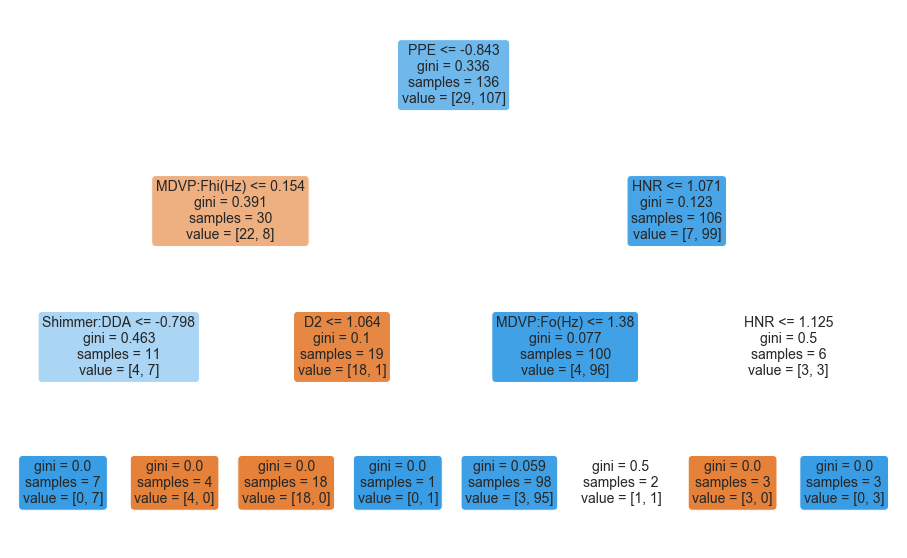

In [752]:
# Visualizing the data graphically in a tree form

from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train_scaled, y_train)

plt.figure(figsize=(16,10))
a = plot_tree(clf, feature_names = df_feature_names, filled = True, rounded =True, fontsize =14)

In [393]:
# Importance of features in the tree building

print(pd.DataFrame(dtmod.feature_importances_, columns=['imp'], index = x_train.columns))

                  imp
MDVP:Fo(Hz)       0.0
MDVP:Fhi(Hz)      0.0
MDVP:Flo(Hz)      0.0
MDVP:Jitter(%)    0.0
MDVP:Jitter(Abs)  0.0
MDVP:RAP          0.0
MDVP:PPQ          0.0
Jitter:DDP        0.0
MDVP:Shimmer      0.0
MDVP:Shimmer(dB)  0.0
Shimmer:APQ3      0.0
Shimmer:APQ5      0.0
MDVP:APQ          0.0
Shimmer:DDA       0.0
NHR               0.0
HNR               0.0
RPDE              0.0
DFA               0.0
spread1           0.0
spread2           0.0
D2                0.0
PPE               1.0


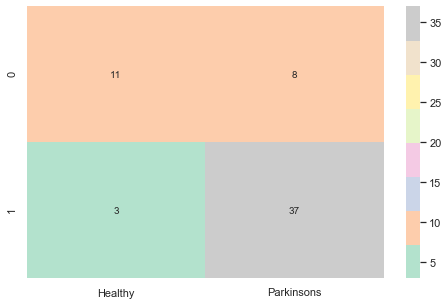

In [394]:
# Plotting confusion matrix graphically

cm7 = metrics.confusion_matrix(y_test, y_pre, labels=[0,1])
df_cm7 = pd.DataFrame(cm7, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm7, annot=True, cmap='Pastel2', fmt='g');

### B. Bagging Classification Model Building.

In [432]:
bgcl = BaggingClassifier(n_estimators = 6, random_state=1)
bgcl.fit(x_train_scaled, y_train.values.ravel())       # Fitting model on training data

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=6,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [433]:
bgcl.score(x_train_scaled, y_train)      # Training data score

1.0

In [438]:
pred_y = bgcl.predict(x_test_scaled)
bgcl_acc = accuracy_score(y_test, pred_y)        # Getting accuracy score of model on test data
bgcl_F1 = f1_score(y_test, pred_y)               # Getting f1 score of the model
bgcl_rec = recall_score(y_test, pred_y)          # Getting recall score of the model
bgcl_AUC = roc_auc_score(y_test, pred_y)         # Finding score of area under curve
bgcl_conf = confusion_matrix(y_test, pred_y)      # Visualizing the confusion matrix of the model
bgcl_class = classification_report(y_test, pred_y)        # Visualizing the classification report of the model

In [734]:
print('The Accuracy score of the model is {0:.2f}%'. format(bgcl_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(bgcl_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(bgcl_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(bgcl_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', bgcl_conf)
print()
print('The Classification Report of the model is :\n', bgcl_class)

The Accuracy score of the model is 79.66%

The F1 score of the model is 86.05%

The Recall score of the model is 92.50%

AUC Score of the model is 72.57%

The Confusion Matrix of the model is :
 [[10  9]
 [ 3 37]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.77      0.53      0.62        19
         1.0       0.80      0.93      0.86        40

    accuracy                           0.80        59
   macro avg       0.79      0.73      0.74        59
weighted avg       0.79      0.80      0.78        59



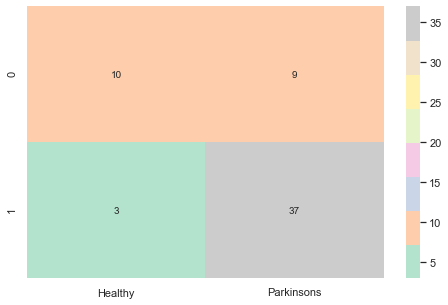

In [442]:
# Plotting confusion matrix graphically

cm8 = metrics.confusion_matrix(y_test, pred_y, labels=[0,1])
df_cm8 = pd.DataFrame(cm8, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm8, annot=True, cmap='Pastel2', fmt='g');

### C. Boosting Classification Model Building.

### 1. AdaBoosting

In [492]:
adcl = AdaBoostClassifier(n_estimators = 18, random_state=1)
adcl.fit(x_train_scaled, y_train.values.ravel())       # Fitting model on train data

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=18, random_state=1)

In [493]:
adcl.score(x_train_scaled, y_train)     # Training data score

1.0

In [496]:
pre_y = adcl.predict(x_test_scaled)
adcl_acc = accuracy_score(y_test, pre_y)        # Getting accuracy score of model on test data
adcl_F1 = f1_score(y_test, pre_y)               # Getting f1 score of the model
adcl_rec = recall_score(y_test, pre_y)          # Getting recall score of the model
adcl_AUC = roc_auc_score(y_test, pre_y)         # Finding score of area under curve
adcl_conf = confusion_matrix(y_test, pre_y)      # Visualizing the confusion matrix of the model
adcl_class = classification_report(y_test, pre_y)        # Visualizing the classification report of the model

In [753]:
print('The Accuracy score of the model is {0:.2f}%'. format(adcl_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(adcl_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(adcl_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(adcl_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', adcl_conf)
print()
print('The Classification Report of the model is :\n', adcl_class)

The Accuracy score of the model is 88.14%

The F1 score of the model is 91.95%

The Recall score of the model is 100.00%

AUC Score of the model is 81.58%

The Confusion Matrix of the model is :
 [[12  7]
 [ 0 40]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.77        19
         1.0       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



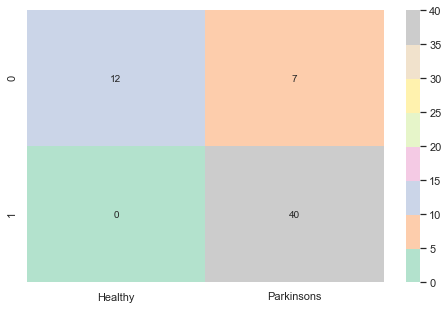

In [499]:
# Plotting confusion matrix graphically

cm9 = metrics.confusion_matrix(y_test, pre_y, labels=[0,1])
df_cm9 = pd.DataFrame(cm9, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm9, annot=True, cmap='Pastel2', fmt='g');

### 2. Gradient Boosting

In [547]:
gbcl = GradientBoostingClassifier(n_estimators = 95, random_state=1)
gbcl.fit(x_train_scaled, y_train.values.ravel())        # Fitting model on training data

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=95,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [548]:
gbcl.score(x_train_scaled, y_train)      # Training data score

1.0

In [551]:
pr_y = gbcl.predict(x_test_scaled)
gbcl_acc = accuracy_score(y_test, pr_y)        # Getting accuracy score of model on test data
gbcl_F1 = f1_score(y_test, pr_y)               # Getting f1 score of the model
gbcl_rec = recall_score(y_test, pr_y)          # Getting recall score of the model
gbcl_AUC = roc_auc_score(y_test, pr_y)         # Finding score of area under curve
gbcl_conf = confusion_matrix(y_test, pr_y)      # Visualizing the confusion matrix of the model
gbcl_class = classification_report(y_test, pr_y)        # Visualizing the classification report of the model

In [754]:
print('The Accuracy score of the model is {0:.2f}%'. format(gbcl_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(gbcl_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(gbcl_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(gbcl_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', gbcl_conf)
print()
print('The Classification Report of the model is :\n', gbcl_class)

The Accuracy score of the model is 79.66%

The F1 score of the model is 86.67%

The Recall score of the model is 97.50%

AUC Score of the model is 69.80%

The Confusion Matrix of the model is :
 [[ 8 11]
 [ 1 39]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.89      0.42      0.57        19
         1.0       0.78      0.97      0.87        40

    accuracy                           0.80        59
   macro avg       0.83      0.70      0.72        59
weighted avg       0.82      0.80      0.77        59



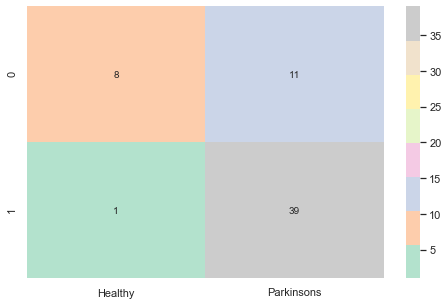

In [553]:
# Plotting confusion matrix graphically

cm10 = metrics.confusion_matrix(y_test, pr_y, labels=[0,1])
df_cm10 = pd.DataFrame(cm10, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm10, annot=True, cmap='Pastel2', fmt='g');

### C. Random Forest Model Building.

In [634]:
rfmod = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=3)
rfmod.fit(x_train_scaled, y_train.values.ravel())     # Fitting model on training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [635]:
rfmod.score(x_train_scaled, y_train)      # Training data score

1.0

In [640]:
p_y = rfmod.predict(x_test_scaled)
rfmod_acc = accuracy_score(y_test, p_y)        # Getting accuracy score of model on test data
rfmod_F1 = f1_score(y_test, p_y)               # Getting f1 score of the model
rfmod_rec = recall_score(y_test, p_y)          # Getting recall score of the model
rfmod_AUC = roc_auc_score(y_test, p_y)         # Finding score of area under curve
rfmod_conf = confusion_matrix(y_test, p_y)      # Visualizing the confusion matrix of the model
rfmod_class = classification_report(y_test, p_y)        # Visualizing the classification report of the model

In [755]:
print('The Accuracy score of the model is {0:.2f}%'. format(rfmod_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(rfmod_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(rfmod_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(rfmod_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', rfmod_conf)
print()
print('The Classification Report of the model is :\n', rfmod_class)

The Accuracy score of the model is 81.36%

The F1 score of the model is 87.64%

The Recall score of the model is 97.50%

AUC Score of the model is 72.43%

The Confusion Matrix of the model is :
 [[ 9 10]
 [ 1 39]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.90      0.47      0.62        19
         1.0       0.80      0.97      0.88        40

    accuracy                           0.81        59
   macro avg       0.85      0.72      0.75        59
weighted avg       0.83      0.81      0.79        59



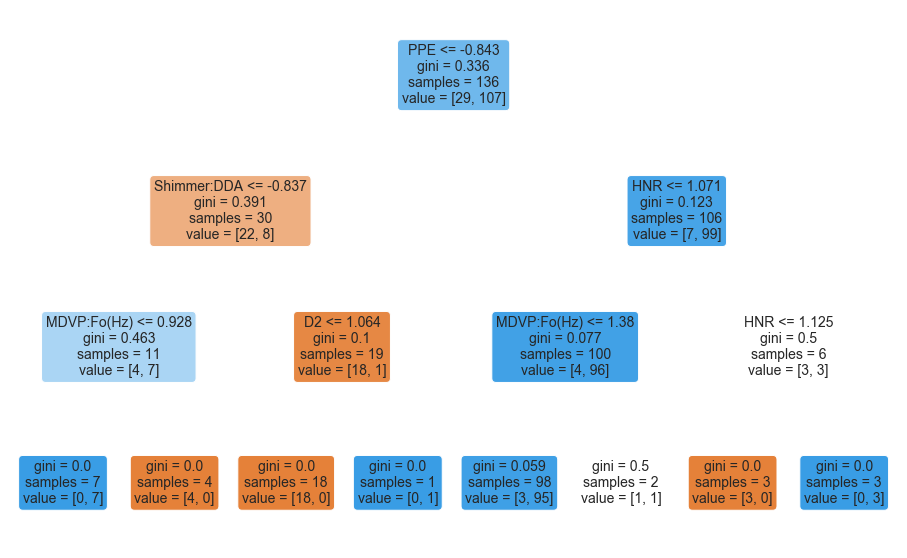

In [652]:
# Visualizing the data graphically in a tree form

from sklearn.tree import plot_tree 

clf1 = DecisionTreeClassifier(max_depth = 3)
clf1.fit(x_train_scaled, y_train)     # Fitting model on training data

plt.figure(figsize=(16,10))
b = plot_tree(clf1, feature_names = df_feature_names, filled =True, rounded = True, fontsize=14)

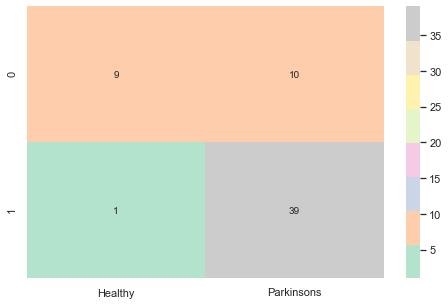

In [669]:
# Plotting confusion matrix graphically

cm11 = metrics.confusion_matrix(y_test, p_y, labels=[0,1])
df_cm11 = pd.DataFrame(cm11, index = [i for i in ['0','1']],
                     columns = [i for i in ['Healthy','Parkinsons']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm11, annot=True, cmap='Pastel2', fmt='g');

### 7. Train a meta-classifier and note the accuracy on test data

In [668]:
from sklearn.ensemble import StackingClassifier

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors=1, weights='distance', metric = 'euclidean')))
level0.append(('bayes', GaussianNB()))
level0.append(('svm', svm.SVC(gamma=0.1, C=70)))

### A. Stacking on Logistic Regression

In [703]:
level1 = LogisticRegression()
stack_LGR = StackingClassifier(estimators = level0, final_estimator=level1, cv=10)

In [756]:
stack_LGR.fit(x_train_scaled, y_train.values.ravel())      # Fitting model on taining data

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                

In [705]:
stack_LGR.score(x_train_scaled, y_train)       # Training data score

1.0

In [706]:
stpred = stack_LGR.predict(x_test_scaled)
stack_LGR_acc = accuracy_score(y_test, stpred)        # Getting accuracy score on test data
stack_LGR_F1 = f1_score(y_test, stpred)               # Getting f1 score of the model
stack_LGR_rec = recall_score(y_test, stpred)          # Getting recall score of the model
stack_LGR_AUC = roc_auc_score(y_test, stpred)         # Finding score of area under curve
stack_LGR_conf = confusion_matrix(y_test, stpred)      # Visualizing the confusion matrix of the model
stack_LGR_class = classification_report(y_test, stpred)        # Visualizing the classification report of the model

In [738]:
print('The Accuracy Score of the model is {0:.2f}%'. format(stack_LGR_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(stack_LGR_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(stack_LGR_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(stack_LGR_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', stack_LGR_conf)
print()
print('The Classification Report of the model is :\n', stack_LGR_class)

The Accuracy Score of the model is 91.53%

The F1 score of the model is 94.12%

The Recall score of the model is 100.00%

AUC Score of the model is 86.84%

The Confusion Matrix of the model is :
 [[14  5]
 [ 0 40]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        19
         1.0       0.89      1.00      0.94        40

    accuracy                           0.92        59
   macro avg       0.94      0.87      0.89        59
weighted avg       0.92      0.92      0.91        59



### B. Stacking on SVM

In [708]:
level1 = svm.SVC(gamma=0.1, C=70)
stack_SVM = StackingClassifier(estimators = level0, final_estimator=level1, cv=10)

In [709]:
stack_SVM.fit(x_train_scaled, y_train.values.ravel())      # Fitting model on train data

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                

In [710]:
stpred1 = stack_SVM.predict(x_test_scaled)
stack_SVM_acc = accuracy_score(y_test, stpred1)        # Getting accuracy score on test data set
stack_SVM_acc = accuracy_score(y_test, stpred1)        # Getting accuracy score on test data
stack_SVM_F1 = f1_score(y_test, stpred1)               # Getting f1 score of the model
stack_SVM_rec = recall_score(y_test, stpred1)          # Getting recall score of the model
stack_SVM_AUC = roc_auc_score(y_test, stpred1)         # Finding score of area under curve
stack_SVM_conf = confusion_matrix(y_test, stpred1)      # Visualizing the confusion matrix of the model
stack_SVM_class = classification_report(y_test, stpred1)        # Visualizing the classification report of the model

In [757]:
print('The Accuracy Score of the model is {0:.2f}%'. format(stack_SVM_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(stack_SVM_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(stack_SVM_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(stack_SVM_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', stack_SVM_conf)
print()
print('The Classification Report of the model is :\n', stack_SVM_class)

The Accuracy Score of the model is 91.53%

The F1 score of the model is 93.98%

The Recall score of the model is 97.50%

AUC Score of the model is 88.22%

The Confusion Matrix of the model is :
 [[15  4]
 [ 1 39]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.91      0.97      0.94        40

    accuracy                           0.92        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.92      0.92      0.91        59



### C. Stacking on KNN

In [712]:
level1 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
stack_KNN = StackingClassifier(estimators = level0, final_estimator=level1, cv=10)

In [713]:
stack_KNN.fit(x_train_scaled, y_train.values.ravel())      # Fitting model on train data

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                

In [742]:
stpred2 = stack_KNN.predict(x_test_scaled)
stack_KNN_acc = accuracy_score(y_test, stpred2)        # Getting accuracy score on test data set
stack_KNN_F1 = f1_score(y_test, stpred2)               # Getting f1 score of the model
stack_KNN_rec = recall_score(y_test, stpred2)          # Getting recall score of the model
stack_KNN_AUC = roc_auc_score(y_test, stpred2)         # Finding score of area under curve
stack_KNN_conf = confusion_matrix(y_test, stpred2)      # Visualizing the confusion matrix of the model
stack_KNN_class = classification_report(y_test, stpred2)        # Visualizing the classification report of the model

In [758]:
print('The Accuracy Score of the model is {0:.2f}%'. format(stack_KNN_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(stack_KNN_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(stack_KNN_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(stack_KNN_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', stack_KNN_conf)
print()
print('The Classification Report of the model is :\n', stack_KNN_class)

The Accuracy Score of the model is 91.53%

The F1 score of the model is 93.98%

The Recall score of the model is 97.50%

AUC Score of the model is 88.22%

The Confusion Matrix of the model is :
 [[15  4]
 [ 1 39]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.91      0.97      0.94        40

    accuracy                           0.92        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.92      0.92      0.91        59



### D. Stacking on Naive Bayes

In [726]:
level1 = GaussianNB()
stack_Gau = StackingClassifier(estimators = level0, final_estimator=level1, cv=10)

In [728]:
stack_Gau.fit(x_train_scaled, y_train.values.ravel())    # Fitting data on training set

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                

In [730]:
stpred3 = stack_Gau.predict(x_test_scaled)
stack_Gau_acc = accuracy_score(y_test, stpred3)       # Getting accuracy score of the model 
stack_Gau_F1 = f1_score(y_test, stpred3)              # Getting f1 score of the model
stack_Gau_rec = recall_score(y_test, stpred3)         # Getting recall score of the model
stack_Gau_AUC = roc_auc_score(y_test, stpred3)         # Finding score of AUC 
stack_Gau_conf = confusion_matrix(y_test, stpred3)      # Getting confusion matrix of the model
stack_Gau_class = classification_report(y_test, stpred3)       # Getting classification report of the model

In [759]:
print('The Accuracy Score of the model is {0:.2f}%'. format(stack_Gau_acc*100))
print()
print('The F1 score of the model is {0:.2f}%'. format(stack_Gau_F1*100))
print()
print('The Recall score of the model is {0:.2f}%'. format(stack_Gau_rec*100))
print()
print('AUC Score of the model is {0:.2f}%'. format(stack_Gau_AUC*100))
print()
print('The Confusion Matrix of the model is :\n', stack_Gau_conf)
print()
print('The Classification Report of the model is :\n', stack_Gau_class)

The Accuracy Score of the model is 91.53%

The F1 score of the model is 93.98%

The Recall score of the model is 97.50%

AUC Score of the model is 88.22%

The Confusion Matrix of the model is :
 [[15  4]
 [ 1 39]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        19
         1.0       0.91      0.97      0.94        40

    accuracy                           0.92        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.92      0.92      0.91        59



### 9. Compare all the models (minimum 5) and pick the best one among them

In [751]:
# Comparing all models

df_comp = pd.DataFrame({'Algorithm':['Logistic Reg', 'KNN', 'Naive','SVM Linear','SVM RBF','SVM Poly','SVM Sigmoid','Decision Tree','Bagging','AdaBoosting','Gradient Boosting','Random Forest','Stacking Log Reg','Stacking SVM','Stacking KNN','Stacking Naive'],
                        'Accuracy Score (%)':[logmod_acc*100,KNNmod_acc*100,gaumod_acc*100,Svmlinear_acc*100, Svmrbf_acc*100, Svmpoly_acc*100, Svmsig_acc*100, dtmod_acc*100, bgcl_acc*100, adcl_acc*100, gbcl_acc*100, rfmod_acc*100, stack_LGR_acc*100, stack_SVM_acc*100, stack_KNN_acc*100, stack_Gau_acc*100],    # Pulling out accuracy score of all models
                        'F1-score (%)':[logmod_F1*100,KNNmod_F1*100,gaumod_F1*100,Svmlinear_F1*100, Svmrbf_F1*100, Svmpoly_F1*100, Svmsig_F1*100, dtmod_F1*100, bgcl_F1*100, adcl_F1*100, gbcl_F1*100, rfmod_F1*100, stack_LGR_F1*100, stack_SVM_F1*100, stack_KNN_F1*100, stack_Gau_F1*100],       # Pulling out F1 score of all models
                        'Recall Score(%)':[logmod_rec*100, KNNmod_rec*100, gaumod_rec*100, Svmlinear_rec*100, Svmrbf_rec*100, Svmpoly_rec*100, Svmsig_rec*100, dtmod_rec*100, bgcl_rec*100, adcl_rec*100, gbcl_rec*100, rfmod_rec*100, stack_LGR_rec*100,stack_SVM_rec*100,stack_KNN_rec*100, stack_Gau_rec*100]})        # Pulling out recall score of all models     

print("Following table shows comparison of the classification algorithms (using scaled data): ")
df_comp

Following table shows comparison of the classification algorithms (using scaled data): 


Algorithm  Accuracy Score (%)  F1-score (%)  Recall Score(%)
0        Logistic Reg           83.050847     88.636364             97.5
1                 KNN           91.525424     93.827160             95.0
2               Naive           66.101695     72.222222             65.0
3          SVM Linear           86.440678     90.697674             97.5
4             SVM RBF           89.830508     93.023256            100.0
5            SVM Poly           81.355932     86.746988             90.0
6         SVM Sigmoid           84.745763     89.655172             97.5
7       Decision Tree           81.355932     87.058824             92.5
8             Bagging           79.661017     86.046512             92.5
9         AdaBoosting           88.135593     91.954023            100.0
10  Gradient Boosting           79.661017     86.666667             97.5
11      Random Forest           81.355932     87.640449             97.5
12   Stacking Log Reg           91.525424     94.117647            100.0
13       Stacking SVM           91.525424     93.975904             97.5
14       Stacking KNN           91.525424     93.975904             97.5
15     Stacking Naive           91.525424     93.975904             97.5

We can observe from the above result that "KNN Model" has : 
1. Accuracy Score (91.53%), 
2. F1 Score(93.83%), 
3. Recall Score(95%), 
4. Precision Score(93%) 

--------  Whereas "Stacking model of Logistic Regresion" has : 
1. Accuracy Score (91.53%), 
2. F1 Score(94.12%), 
3. Recall Score(100%),  
4. Precision Score(89%).  

From the above analysis both models are almost similar but we should go with "KNN Model as the ('Precison Score') which plays an important role in data analysis is higher, though the Stacking model of Logistic Regssion" has higher or similar scores on other parameters.